In [35]:
from pdb import line_prefix
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-kearn

ERROR: Could not find a version that satisfies the requirement scikit-kearn (from versions: none)
ERROR: No matching distribution found for scikit-kearn


In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [305]:
df = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx',sheet_name='Annual Planted',skiprows=1)

In [306]:
list_of_states = set(df['State'])

GEORGIA  →  R² = 0.1448,   coeffs = [ 4.73391373e-04 -9.44364294e-01]


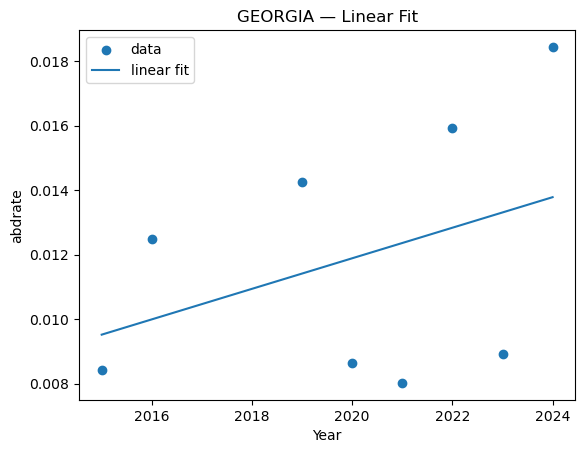

  → Prediction for 2025: 0.0142532364394099

CALIFORNIA  →  R² = 0.2954,   coeffs = [ 7.22364284e-04 -1.44654915e+00]


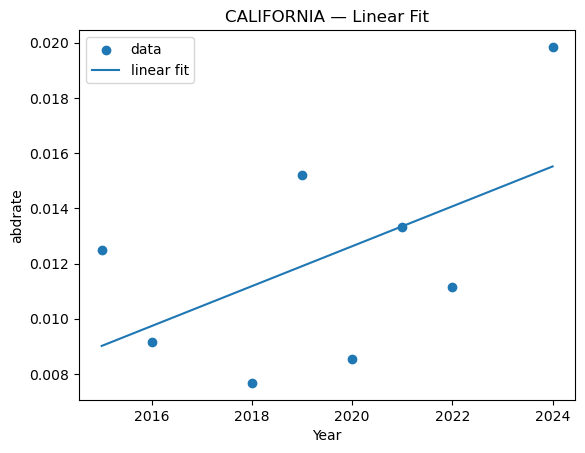

  → Prediction for 2025: 0.016238528025880772

SOUTH CAROLINA  →  R² = 0.2913,   coeffs = [-6.24902480e-03  1.26596587e+01]


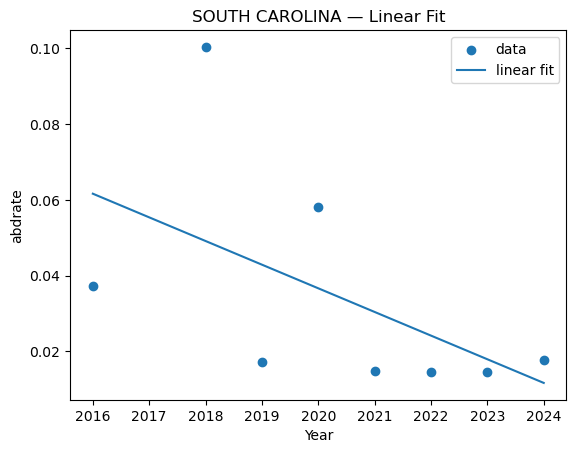

  → Prediction for 2025: 0.005383467144634224

NORTH CAROLINA  →  R² = 0.2456,   coeffs = [-4.09345226e-03  8.30842705e+00]


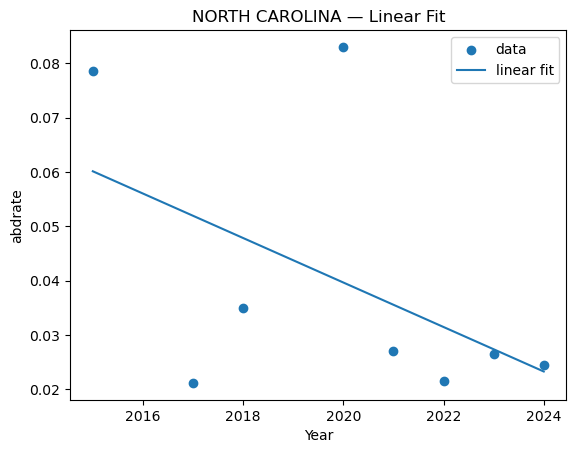

  → Prediction for 2025: 0.01918622676079984

VIRGINIA  →  R² = 0.0202,   coeffs = [ 4.22572146e-05 -7.35499484e-02]


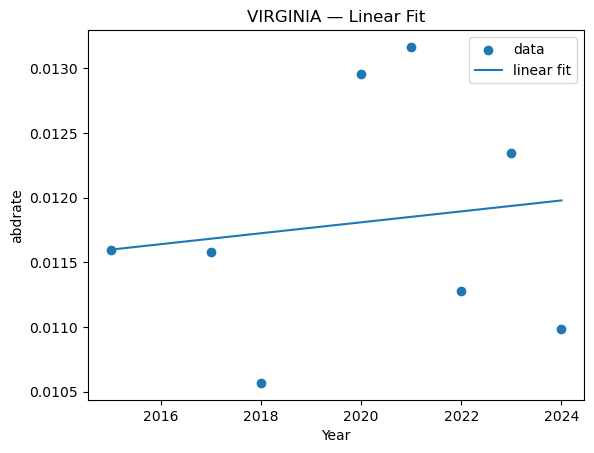

  → Prediction for 2025: 0.012020911080515409

MISSOURI  →  R² = 0.1782,   coeffs = [-2.04290949e-03  4.15892964e+00]


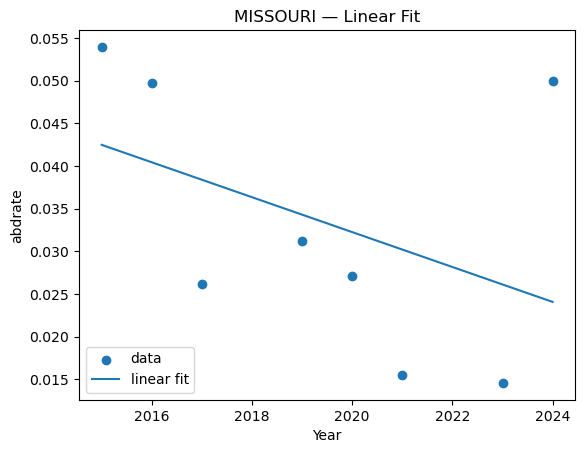

  → Prediction for 2025: 0.022037921435941854

OKLAHOMA  →  R² = 0.6276,   coeffs = [ 5.97385446e-02 -1.20383019e+02]


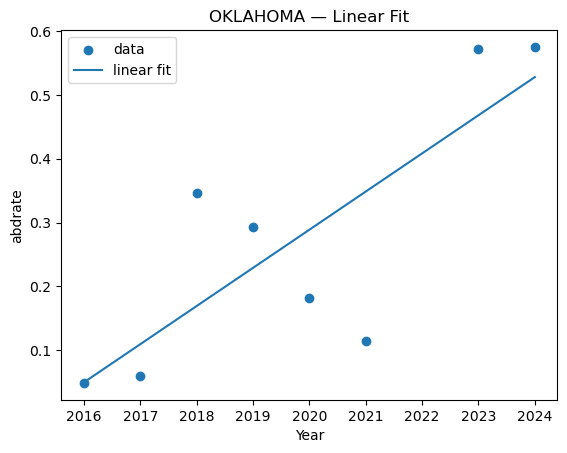

  → Prediction for 2025: 0.5875340002342426

TENNESSEE  →  R² = 0.4263,   coeffs = [ 3.20044183e-03 -6.44180305e+00]


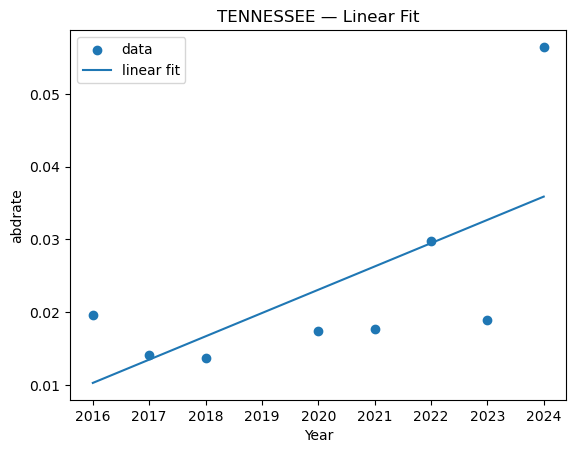

  → Prediction for 2025: 0.03909165268679171

FLORIDA  →  R² = 0.1224,   coeffs = [ 1.45514176e-03 -2.91313537e+00]


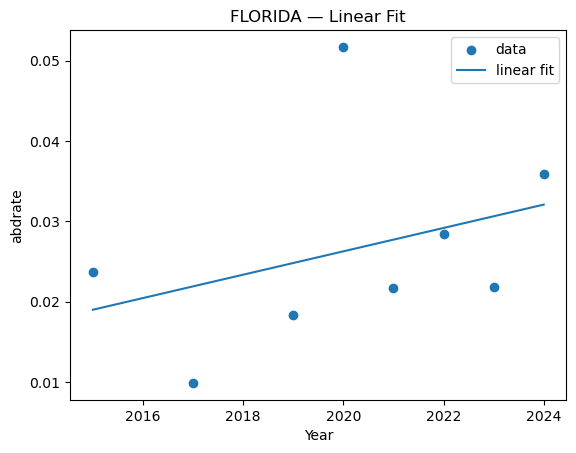

  → Prediction for 2025: 0.03352669095227023

US TOTAL  →  R² = 0.4114,   coeffs = [ 2.54652239e-02 -5.12153407e+01]


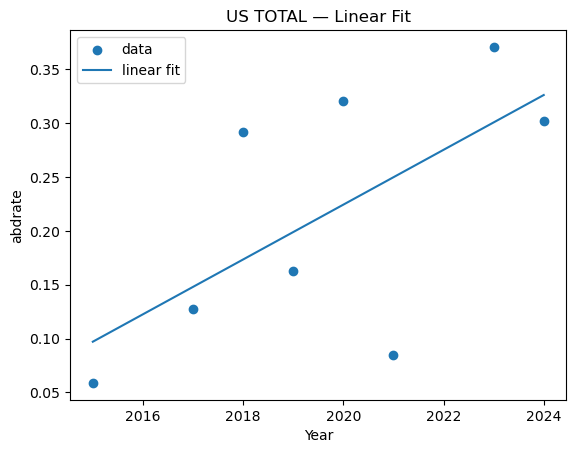

  → Prediction for 2025: 0.3517377401435624

LOUISIANA  →  R² = 0.4156,   coeffs = [ 1.77561835e-03 -3.55336627e+00]


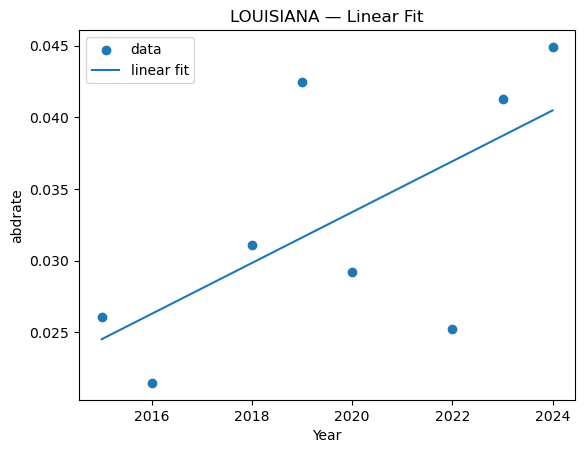

  → Prediction for 2025: 0.04226089335059813

MISSISSIPPI  →  R² = 0.1345,   coeffs = [-2.91880395e-04  6.00895015e-01]


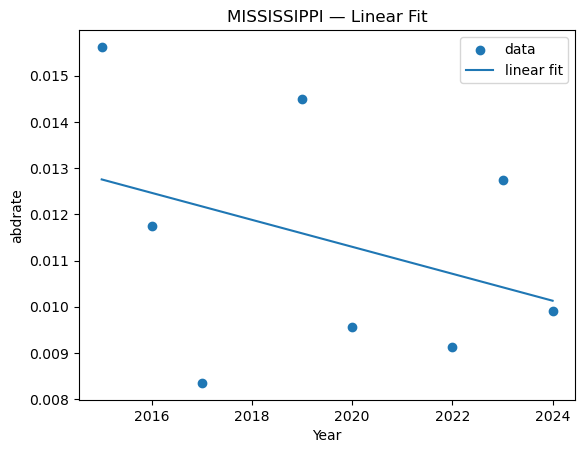

  → Prediction for 2025: 0.009837215810069244

ARIZONA  →  R² = 0.0015,   coeffs = [-4.62250901e-05  1.04990973e-01]


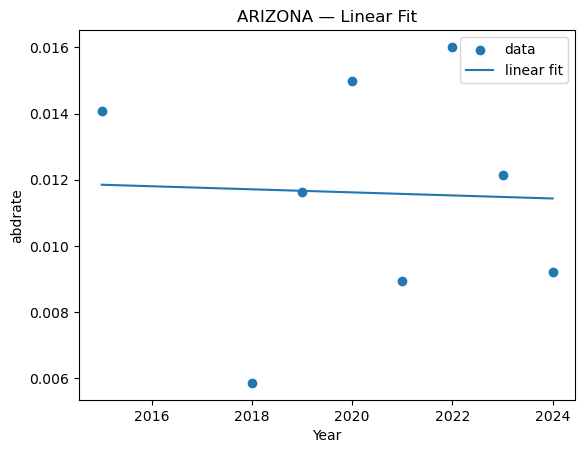

  → Prediction for 2025: 0.011385165790353036

TEXAS  →  R² = 0.4036,   coeffs = [ 4.58850050e-02 -9.23261455e+01]


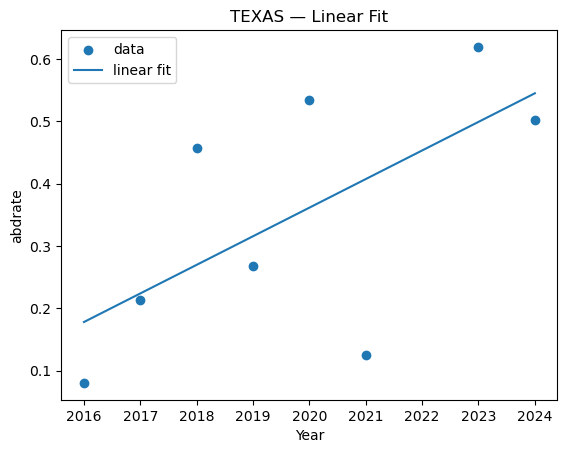

  → Prediction for 2025: 0.5909896982236091

ARKANSAS  →  R² = 0.0425,   coeffs = [-1.61643487e-04  3.39525034e-01]


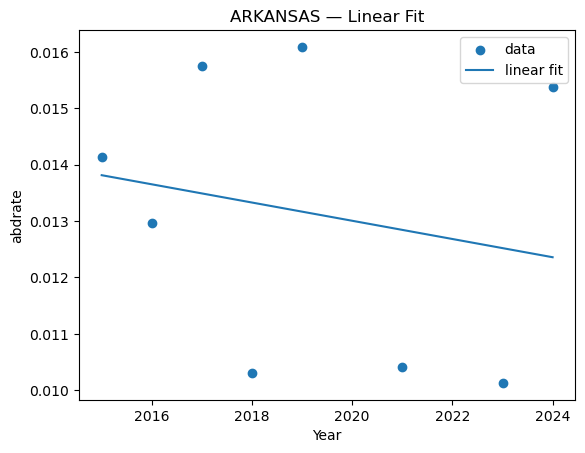

  → Prediction for 2025: 0.012196973774465436

NEW MEXICO  →  R² = 0.2252,   coeffs = [ 1.08175753e-02 -2.15975072e+01]


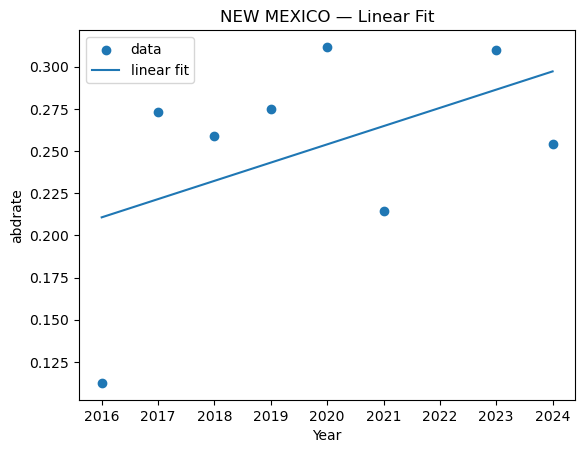

  → Prediction for 2025: 0.3080828676883307

KANSAS  →  R² = 0.0576,   coeffs = [ 4.26459513e-03 -8.52578027e+00]


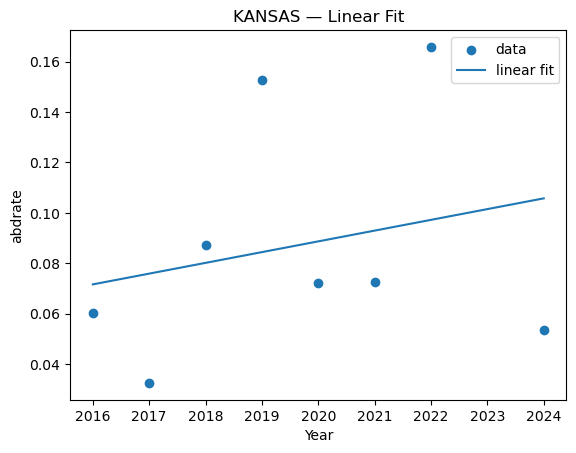

  → Prediction for 2025: 0.11002486583807247

ALABAMA  →  R² = 0.3563,   coeffs = [-1.03855646e-03  2.11161230e+00]


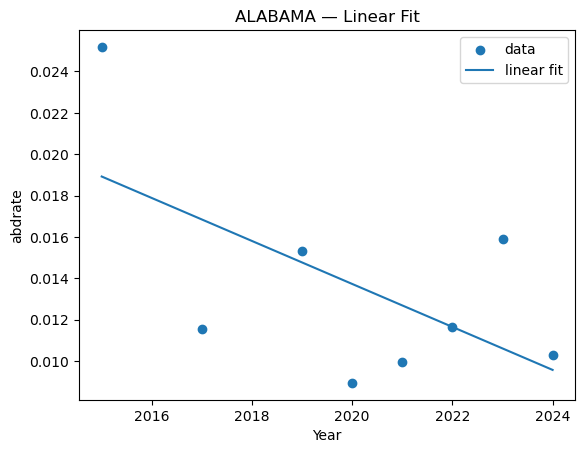

  → Prediction for 2025: 0.008535461738002237



In [307]:
listofabdrate = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values(by=['Year'],ascending=True)
    x = state_df['Year'].sort_values(ascending=True)
    y = state_df['abandonment pct total']
    
    
    lower, upper = y.quantile([0.05, 0.95])
    mask      = y.between(lower, upper)
    x, y      = x[mask], y[mask]
    # ----------------------------------------------------------------
    x = x.values
    y = y.values
    #plt.scatter(x, y)
    #plt.title(states)
    #plt.show()
    # Fit a linear model (degree=1)
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state}  →  R² = {r2:.4f},   coeffs = {coeffs}")

    # Build a smooth curve for plotting
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure()
    plt.scatter(x, y, label='data')
    plt.plot(x_line, y_line, label='linear fit')
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Year")
    plt.ylabel("abdrate")
    plt.legend()
    plt.show()

    # 2025 prediction
    pred_2025 = model(2025)
    print(f"  → Prediction for 2025: {pred_2025}\n")
    listofabdrate.append({state:pred_2025})

GEORGIA  →  R² = 0.0256,   coeffs = [ 4.15151515e+00 -7.48448485e+03]


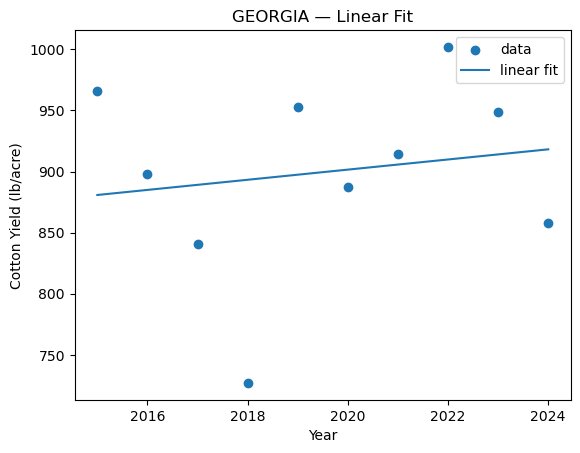

  → Prediction for 2025: 922.3

CALIFORNIA  →  R² = 0.1660,   coeffs = [-1.77575758e+01  3.74058242e+04]


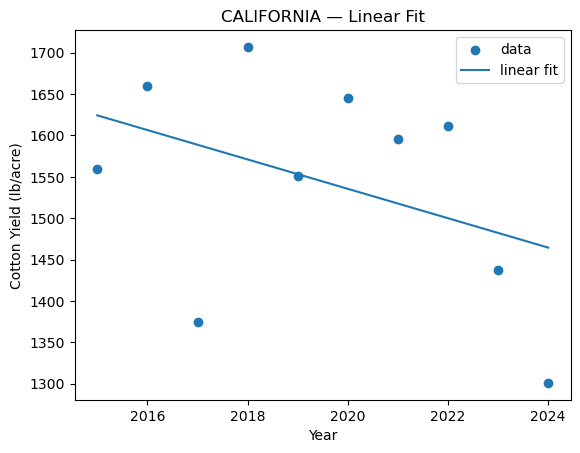

  → Prediction for 2025: 1446.7

SOUTH CAROLINA  →  R² = 0.5478,   coeffs = [ 3.32666667e+01 -6.63653333e+04]


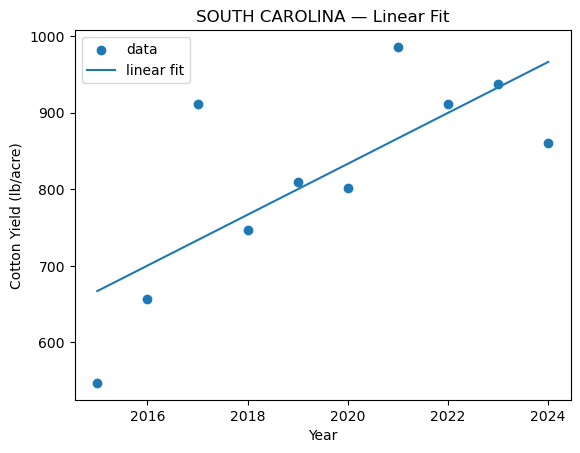

  → Prediction for 2025: 999.7

NORTH CAROLINA  →  R² = 0.4007,   coeffs = [ 2.9369697e+01 -5.8428303e+04]


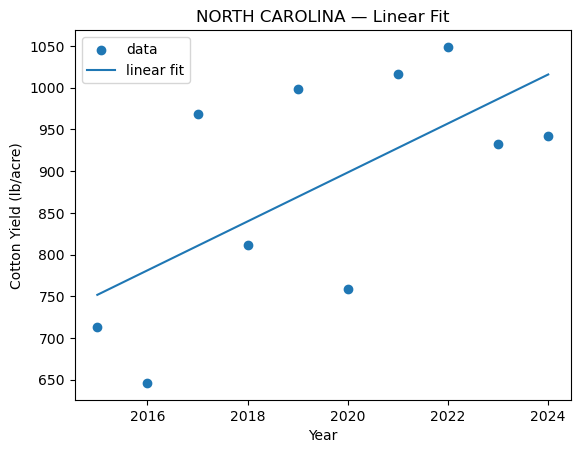

  → Prediction for 2025: 1045.3

VIRGINIA  →  R² = 0.4153,   coeffs = [ 3.89575758e+01 -7.76844242e+04]


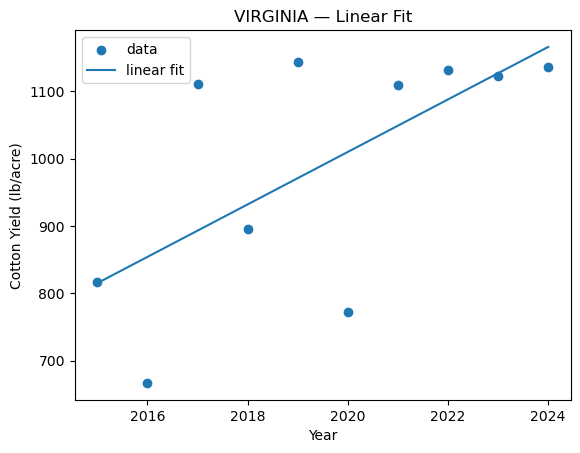

  → Prediction for 2025: 1204.7

MISSOURI  →  R² = 0.4454,   coeffs = [ 2.50848485e+01 -4.94367515e+04]


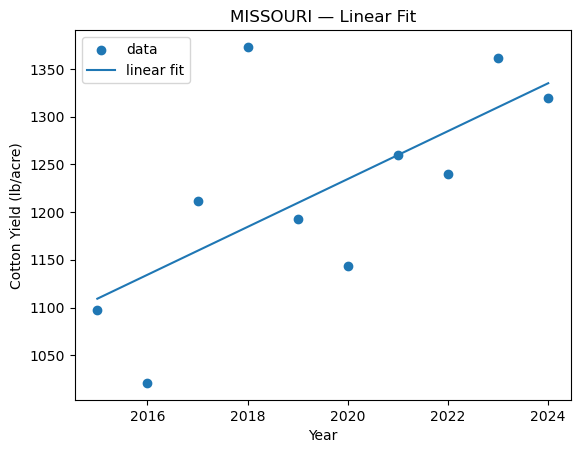

  → Prediction for 2025: 1360.1

OKLAHOMA  →  R² = 0.5637,   coeffs = [-3.35333333e+01  6.84766667e+04]


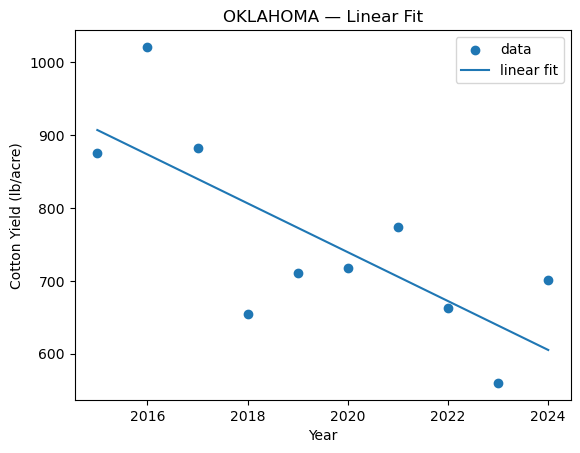

  → Prediction for 2025: 571.7

TENNESSEE  →  R² = 0.0869,   coeffs = [ 6.60000e+00 -1.22468e+04]


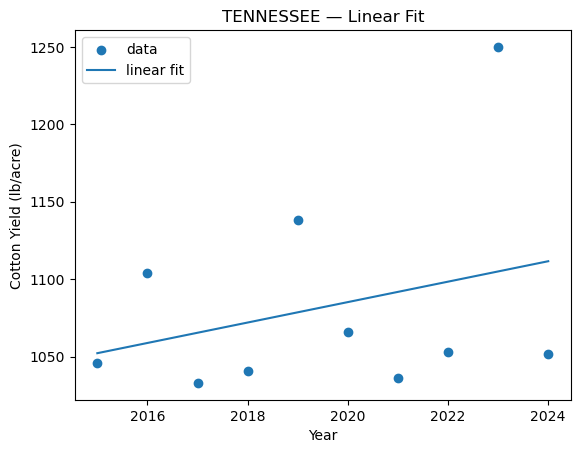

  → Prediction for 2025: 1118.2

FLORIDA  →  R² = 0.2345,   coeffs = [-2.33393939e+01  4.78582061e+04]


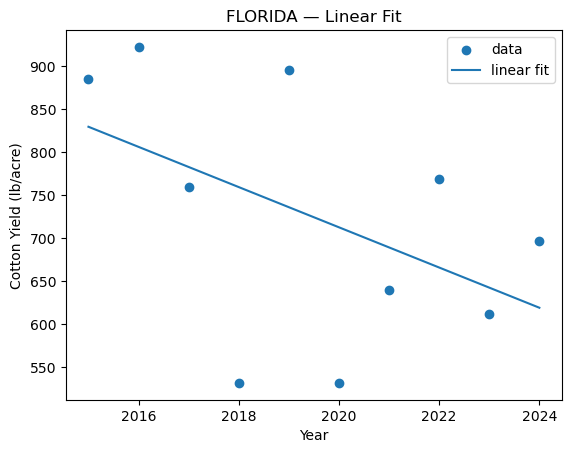

  → Prediction for 2025: 595.9

US TOTAL  →  R² = 0.2370,   coeffs = [ 8.36969697e+00 -1.60359030e+04]


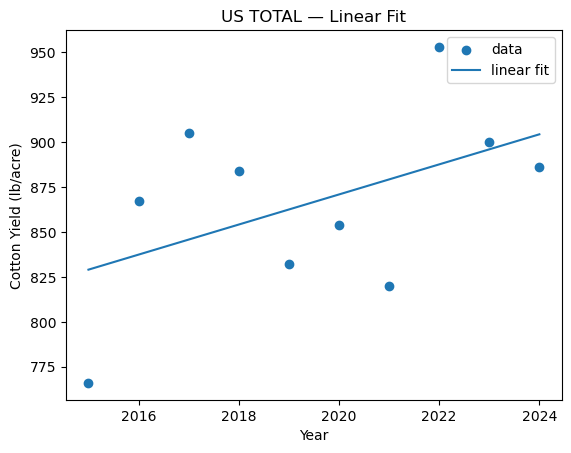

  → Prediction for 2025: 912.7

LOUISIANA  →  R² = 0.1217,   coeffs = [ 1.02848485e+01 -1.98107515e+04]


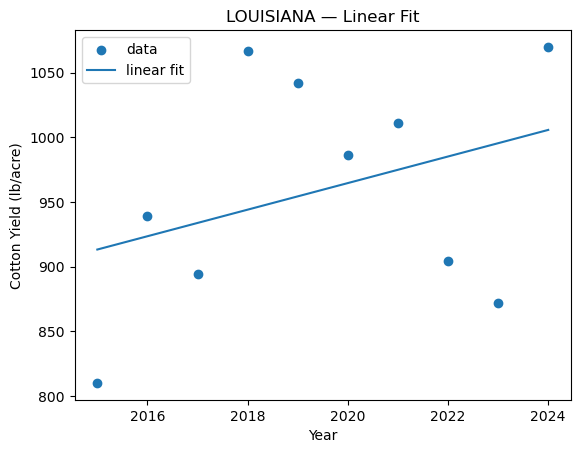

  → Prediction for 2025: 1016.1

MISSISSIPPI  →  R² = 0.0007,   coeffs = [  0.56969697 -58.3030303 ]


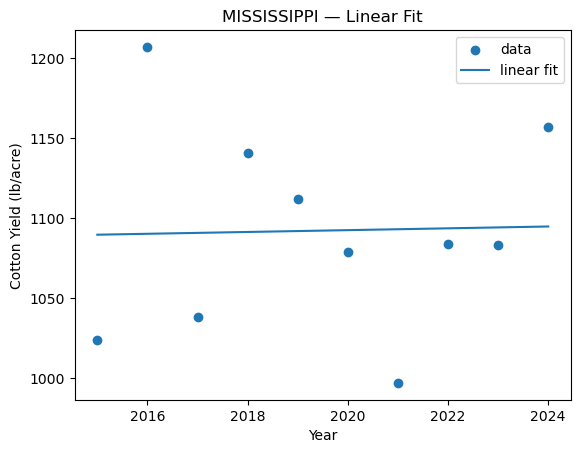

  → Prediction for 2025: 1095.3

ARIZONA  →  R² = 0.1545,   coeffs = [-1.56484848e+01  3.29163152e+04]


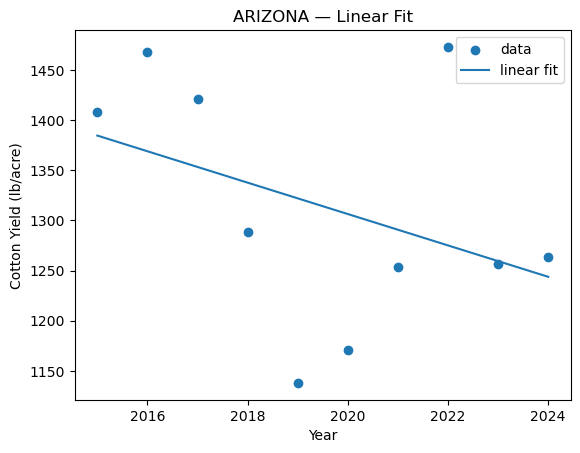

  → Prediction for 2025: 1228.1

TEXAS  →  R² = 0.0740,   coeffs = [-6.80000e+00  1.44238e+04]


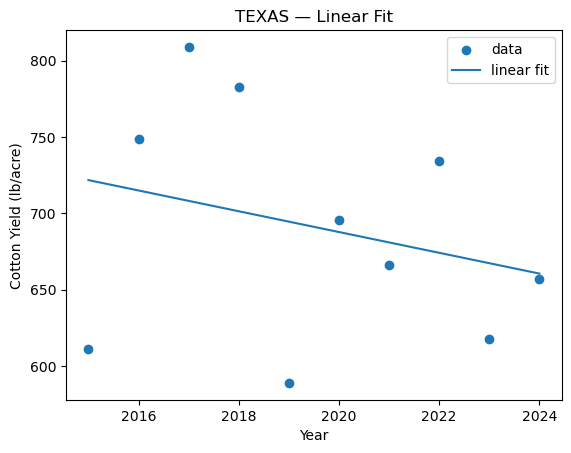

  → Prediction for 2025: 653.8

ARKANSAS  →  R² = 0.8330,   coeffs = [ 2.53333333e+01 -4.99692667e+04]


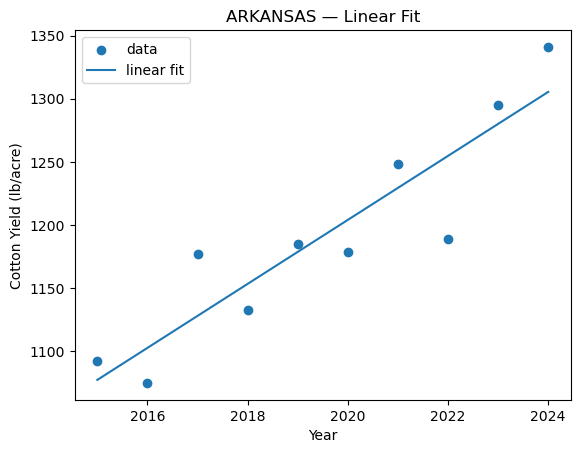

  → Prediction for 2025: 1330.7

NEW MEXICO  →  R² = 0.5244,   coeffs = [-2.97212121e+01  6.09253879e+04]


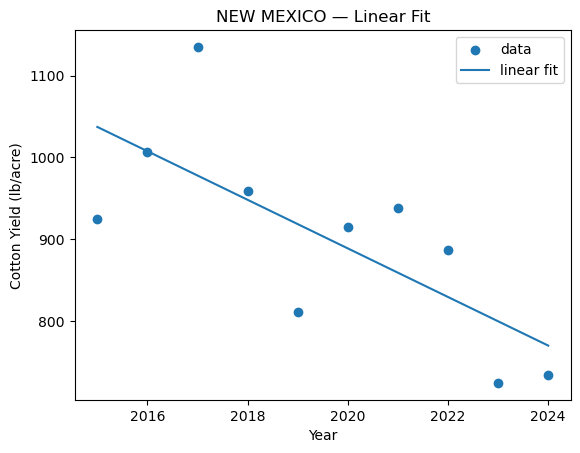

  → Prediction for 2025: 739.9

KANSAS  →  R² = 0.6949,   coeffs = [-4.80909091e+01  9.80266909e+04]


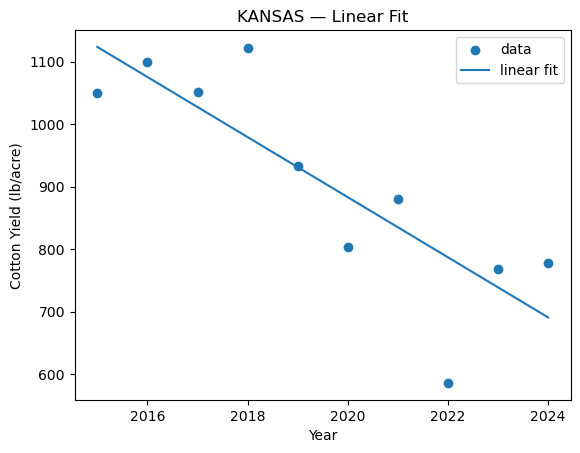

  → Prediction for 2025: 642.6

ALABAMA  →  R² = 0.0714,   coeffs = [-5.55151515e+00  1.20958848e+04]


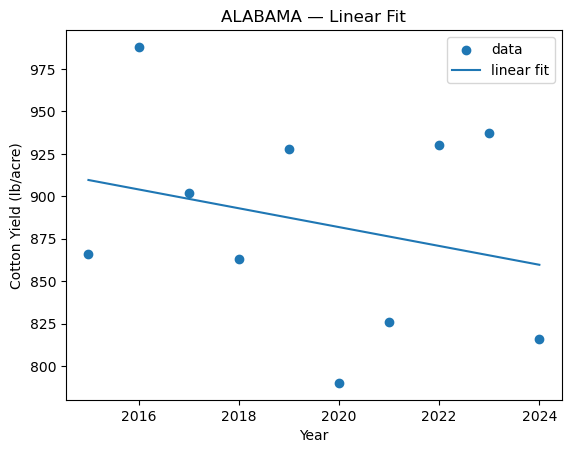

  → Prediction for 2025: 854.1



In [308]:
import numpy as np
import matplotlib.pyplot as plt
listofyields = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values('Year')
    # Use a numpy array for x
    x = np.arange(2015, 2025)                  # [2015, …, 2024]
    y = state_df['COTTON - YIELD, MEASURED IN LB / ACRE'].values[:-1]

    # Fit a linear model (degree=1)
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state}  →  R² = {r2:.4f},   coeffs = {coeffs}")

    # Build a smooth curve for plotting
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure()
    plt.scatter(x, y, label='data')
    plt.plot(x_line, y_line, label='linear fit')
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Year")
    plt.ylabel("Cotton Yield (lb/acre)")
    plt.legend()
    plt.show()

    # 2025 prediction
    pred_2025 = model(2025)
    print(f"  → Prediction for 2025: {pred_2025:.1f}\n")
    listofyields.append({state:pred_2025})

In [309]:
print(listofyields)

[{'GEORGIA': 922.3333333333348}, {'CALIFORNIA': 1446.73333333333}, {'SOUTH CAROLINA': 999.6666666666861}, {'NORTH CAROLINA': 1045.3333333333576}, {'VIRGINIA': 1204.666666666686}, {'MISSOURI': 1360.0666666666802}, {'OKLAHOMA': 571.666666666657}, {'TENNESSEE': 1118.2000000000044}, {'FLORIDA': 595.933333333327}, {'US TOTAL': 912.7333333333354}, {'LOUISIANA': 1016.0666666666766}, {'MISSISSIPPI': 1095.333333333336}, {'ARIZONA': 1228.1333333333241}, {'TEXAS': 653.7999999999993}, {'ARKANSAS': 1330.7333333333372}, {'NEW MEXICO': 739.9333333333198}, {'KANSAS': 642.5999999999913}, {'ALABAMA': 854.0666666666657}]


In [310]:
for states in list_of_states:
    state_df = df[df['State'] == states]
    state_df.sort_values('Year', inplace=True)
    x = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]
    y = state_df['COTTON - YIELD, MEASURED IN LB / ACRE'].tolist()
    y = y[:-1]
    print(x)
    print(y)
    #plt.scatter(x,y)
    #plt.title(states)
    #plt.show()


    # Fit cubic
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{states} R²: {r2:.4f}")
    print(f"{states} coeffs: {coeffs}")

    # Build a smooth x-axis for plotting the fitted curve
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure()               # new figure per state
    plt.scatter(x, y)          # actual data
    plt.plot(x_line, y_line)   # fitted cubic curve
    plt.title(f"{states} — Linear Fit")
    plt.xlabel("x (e.g. Year or your train variable)")
    plt.ylabel("COTTON - ACRES PLANTED")
    plt.show()

    prediction = coeffs[0]*2025 + coeffs[1]
    print(f'prediction: {prediction}')


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
[966.0, 898.0, 841.0, 727.0, 953.0, 887.0, 914.0, 1002.0, 949.0, 858.0]
GEORGIA R²: 0.0256
GEORGIA coeffs: [ 4.15151515e+00 -7.48448485e+03]


/var/folders/b1/lfl3rf212fq4g372d7yytyyc0000gn/T/ipykernel_32724/1677639573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df.sort_values('Year', inplace=True)


AttributeError: 'list' object has no attribute 'min'

In [311]:
futures_prices = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx', sheet_name='FUTURES CLEAN', skiprows=1)

In [312]:
futures_prices.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)

In [313]:
# ensure Date is datetime
futures_prices['Date'] = pd.to_datetime(futures_prices['Date'])
# extract year (no ())
futures_prices['Year'] = futures_prices['Date'].dt.year


In [314]:
futures_prices

,Date,COTTON,SOYBEANS,CORN,SOY TO COTTON,CORN TO COTTON,Year
0,2025-06-01,68.020000,1033.409091,441.068182,15.192724,6.484390,2025
1,2025-05-01,68.554286,1038.607143,444.000000,15.150142,6.476619,2025
2,2025-04-01,68.544286,1019.869048,454.380952,14.878980,6.629013,2025
3,2025-03-01,68.981905,1014.190476,449.904762,14.702268,6.522069,2025
4,2024-06-01,72.558571,1147.250000,464.982143,15.811364,6.408370,2024
5,2024-05-01,76.044091,1204.840909,482.806818,15.843978,6.349038,2024
6,2024-04-01,80.115909,1172.284091,470.397727,14.632351,5.871465,2024
7,2024-03-01,83.658000,1176.825000,469.700000,14.067095,5.614526,2024
8,2023-06-01,80.246667,1260.595238,557.595238,15.709004,6.948516,2023
9,2023-05-01,81.386364,1219.636364,517.863636,14.985758,6.363027,2023


In [315]:
futures_prices = futures_prices.groupby('Year').mean().reset_index()

In [316]:
futures_prices['ratio sum'] = futures_prices['SOY TO COTTON']+futures_prices['CORN TO COTTON']
futures_prices

,Year,Date,COTTON,SOYBEANS,CORN,SOY TO COTTON,CORN TO COTTON,ratio sum
0,2015,2015-04-16,64.893541,946.703179,391.776840,14.590810,6.039142,20.629952
1,2016,2016-04-16,61.066558,1009.026380,395.408685,16.498392,6.478709,22.977102
2,2017,2017-04-16,73.184292,959.401420,388.626086,13.111135,5.314175,18.425310
3,2018,2018-04-16,81.879015,1012.760281,404.662202,12.421813,4.959155,17.380968
4,2019,2019-04-16,71.637231,907.008807,407.867925,12.694095,5.730204,18.424300
5,2020,2020-04-16,57.919622,864.571875,346.797727,14.933984,5.989958,20.923942
6,2021,2021-04-16,83.798200,1319.338526,532.777891,15.739419,6.353238,22.092657
7,2022,2022-04-16,115.864690,1493.765023,701.810954,12.944856,6.065071,19.009927
8,2023,2023-04-16,81.373034,1276.382557,548.204393,15.684510,6.737390,22.421900
9,2024,2024-04-16,78.094143,1175.300000,471.971672,15.088697,6.060849,21.149546


In [317]:
futures_prices_2025_ratio = futures_prices.iloc[10]['ratio sum']
futures_prices_2025_ratio

21.50905123315864

In [318]:
futures_prices.columns

Index(['Year', 'Date', 'COTTON', 'SOYBEANS', 'CORN', 'SOY TO COTTON',
       'CORN TO COTTON', 'ratio sum'],
      dtype='object')

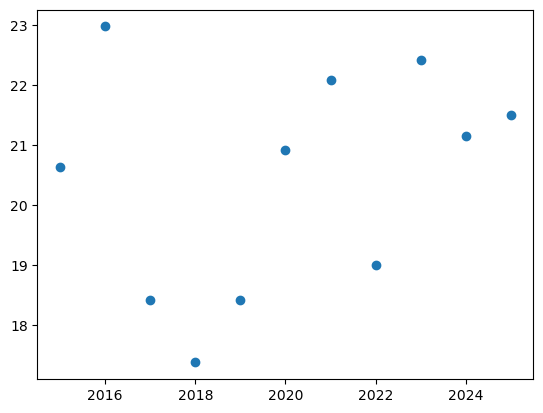

In [319]:
plt.scatter(futures_prices['Year'],futures_prices['ratio sum'])

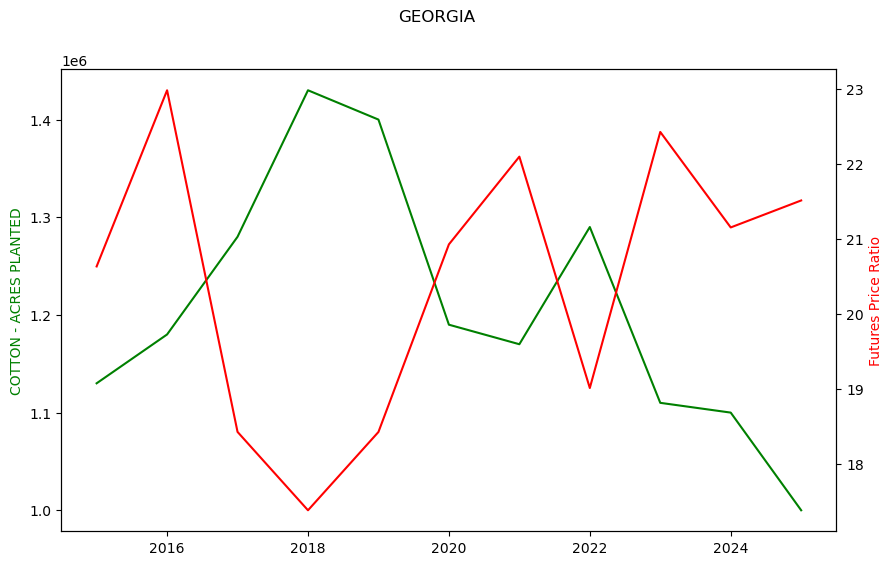

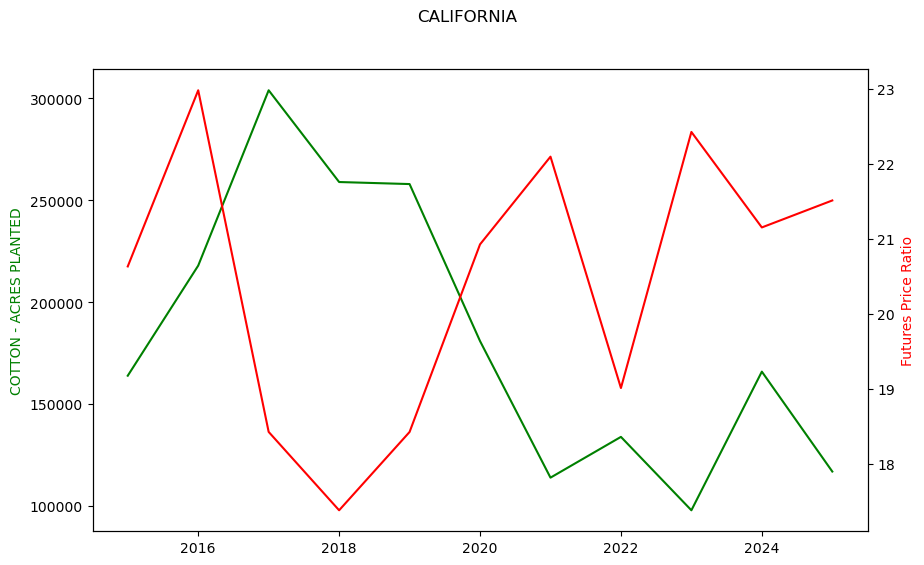

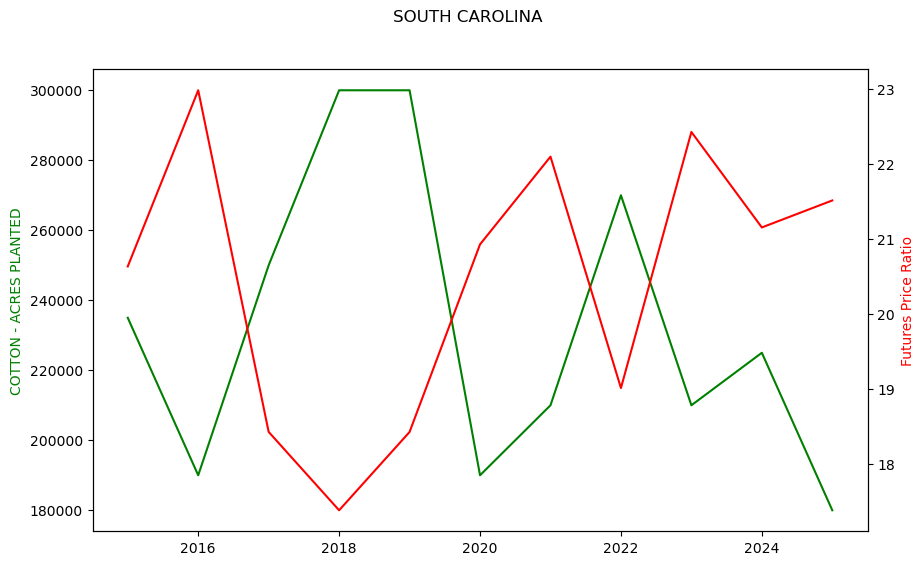

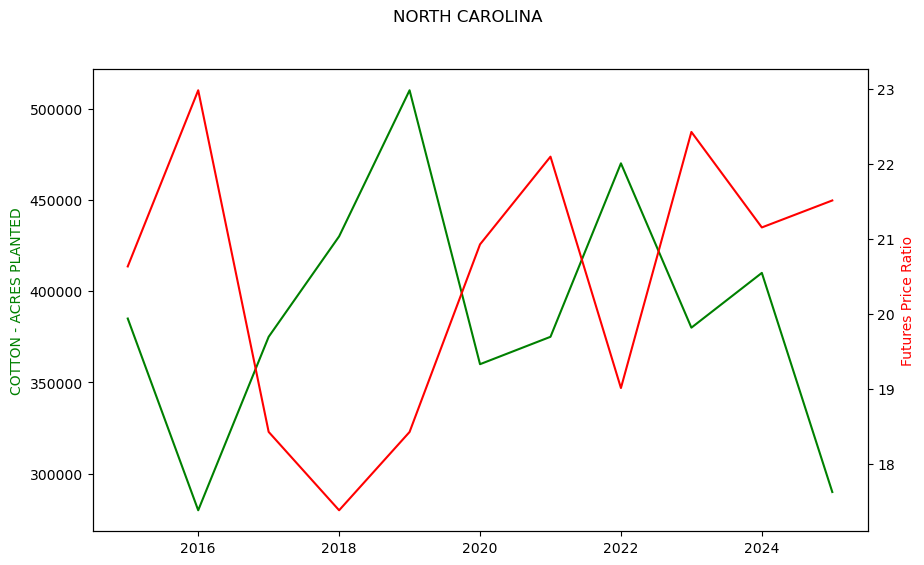

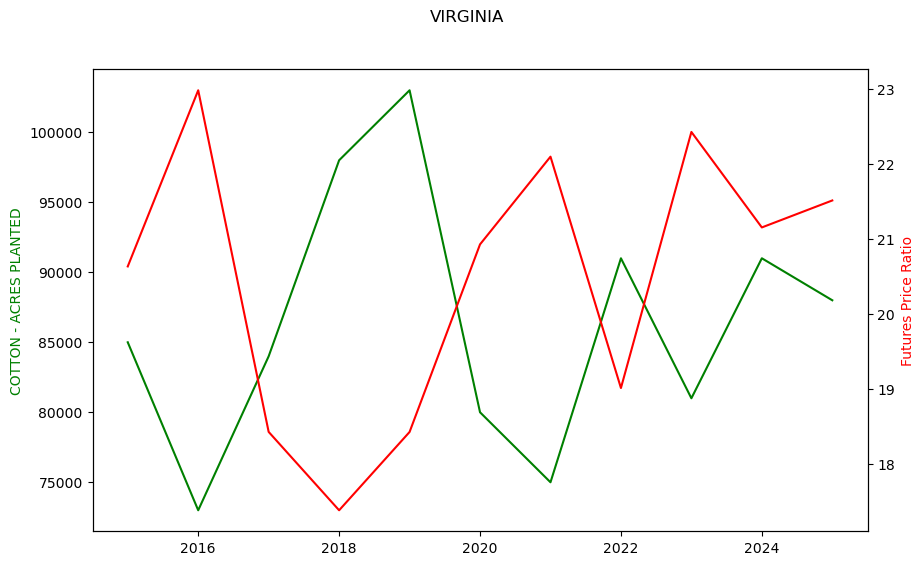

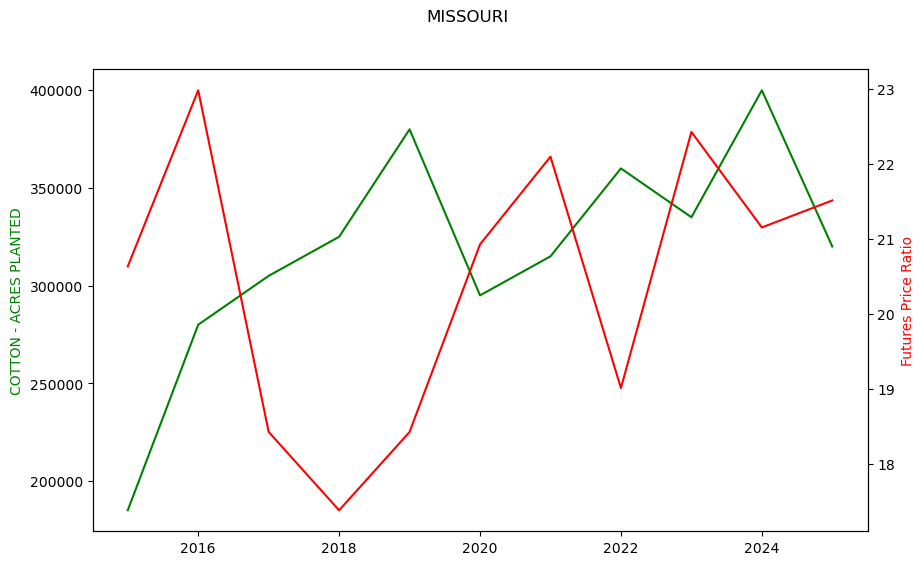

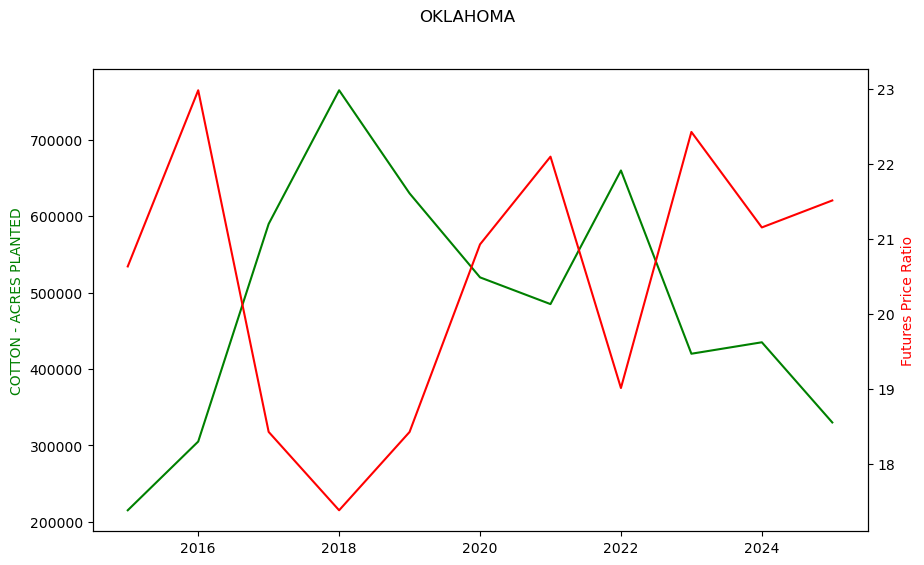

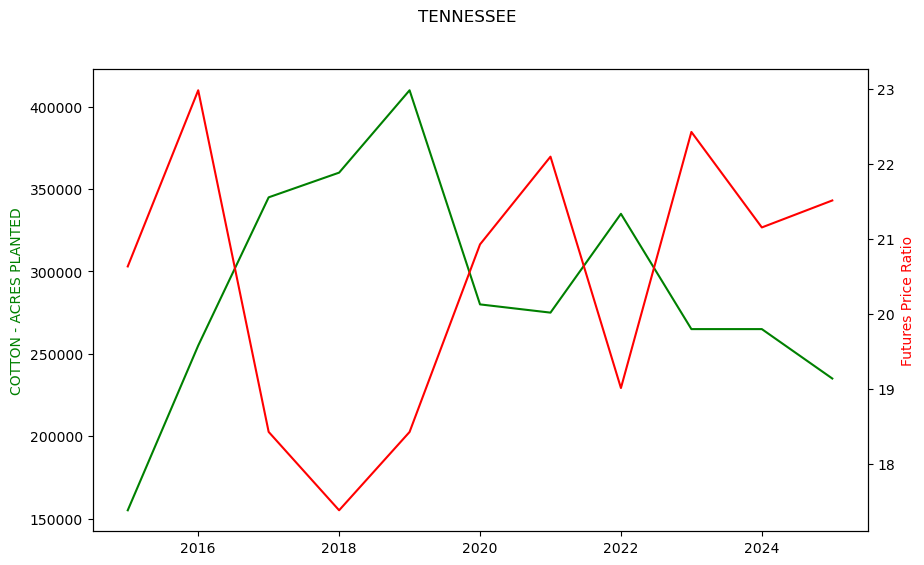

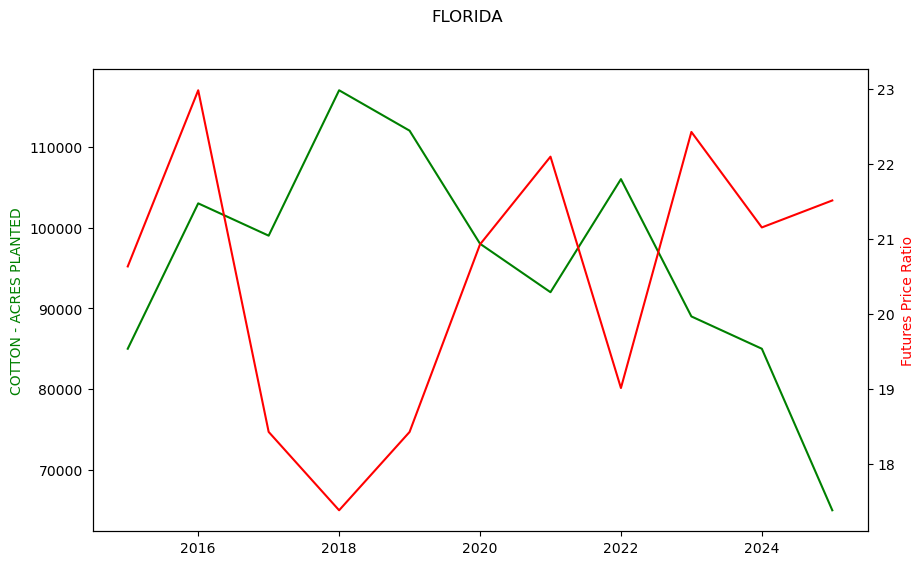

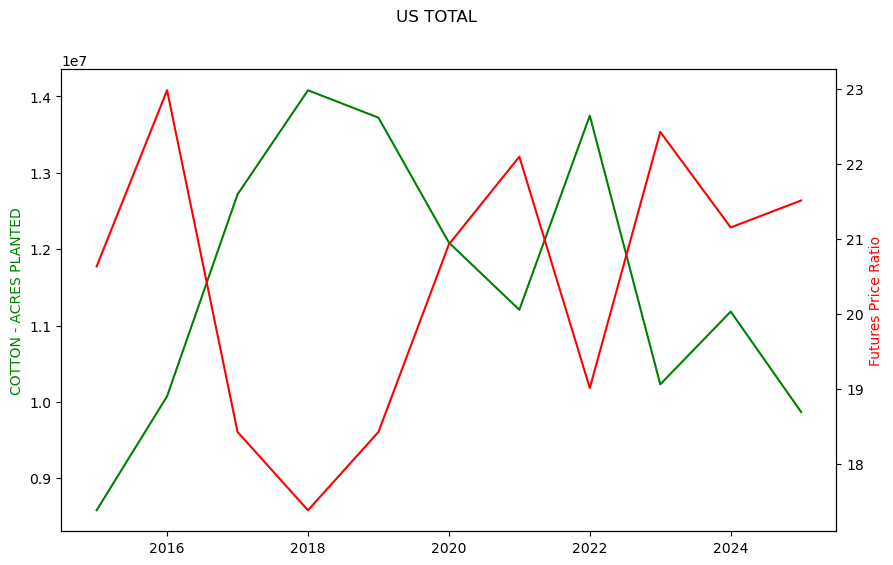

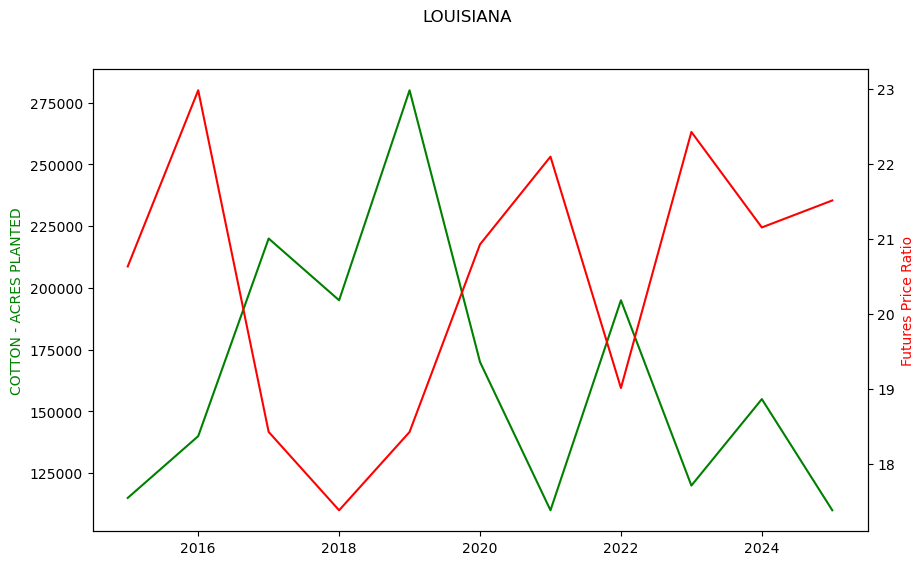

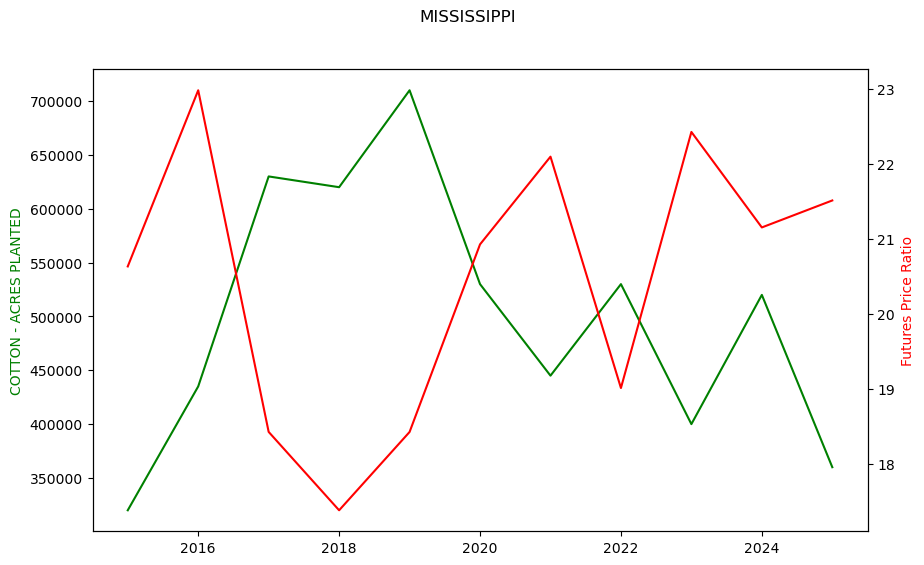

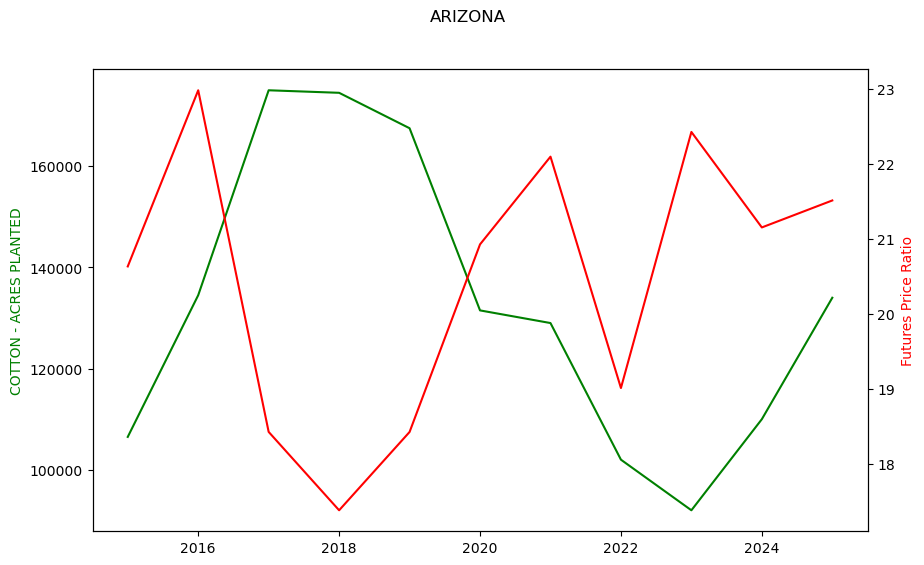

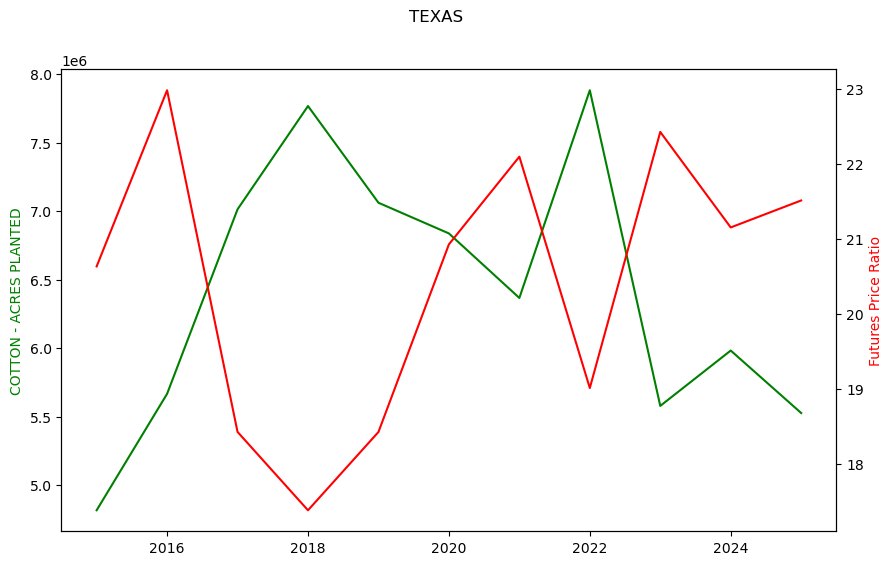

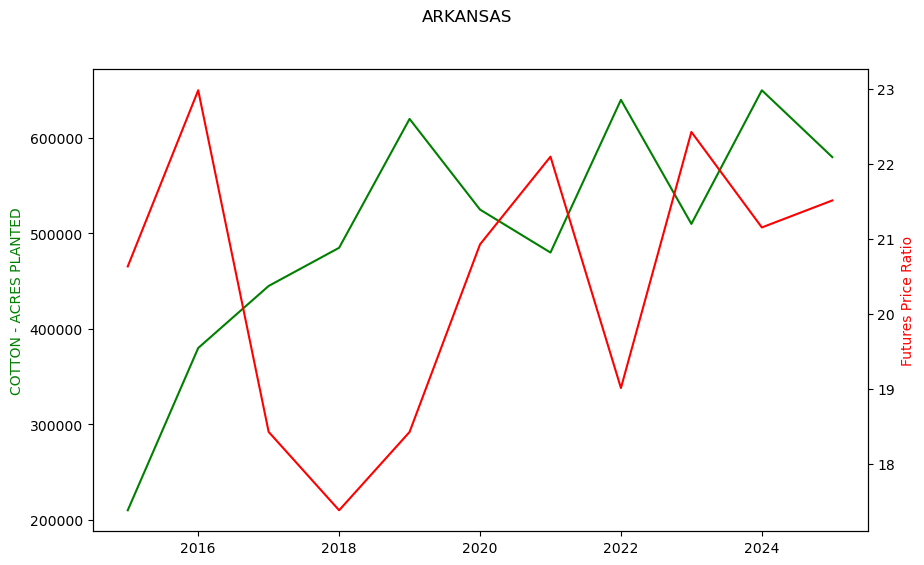

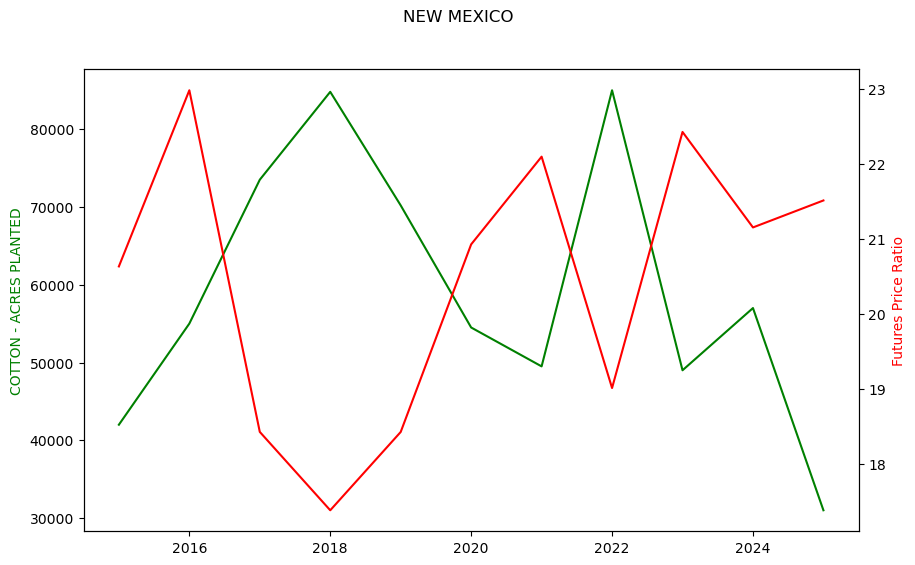

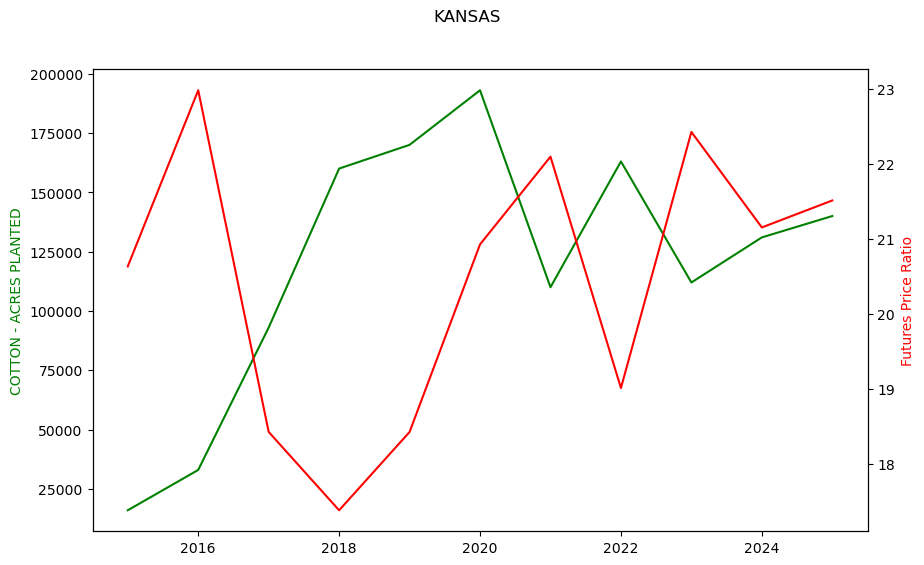

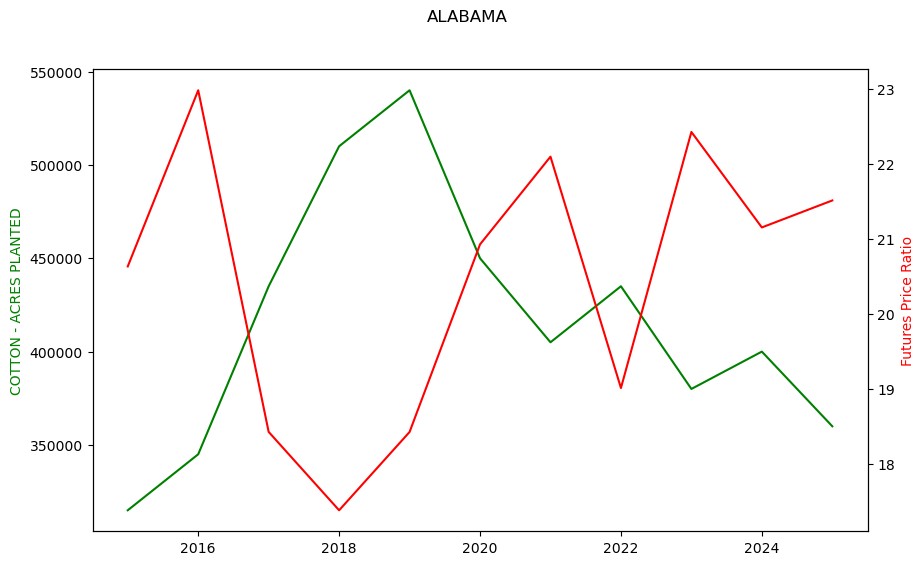

In [322]:
for states in list_of_states:
    state_df = df[df['State'] == states]
    x = state_df['Year']
    y = state_df['COTTON - ACRES PLANTED']
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.set_ylabel('COTTON - ACRES PLANTED', color = 'green')
 
    ax2 = ax1.twinx()
    ax1.plot(x,y, color = 'green')
    fig.suptitle(states)

    ax2.plot(futures_prices['Year'],futures_prices['ratio sum'],color = 'red')
    ax2.set_ylabel('Futures Price Ratio', color = 'red')
    plt.show()

In [231]:
futures_prices_train = futures_prices[:-1]

In [232]:
futures_prices_train

,Year,Date,COTTON,SOYBEANS,CORN,SOY TO COTTON,CORN TO COTTON,ratio sum
0,2015,2015-04-16,64.893541,946.703179,391.776840,14.590810,6.039142,20.629952
1,2016,2016-04-16,61.066558,1009.026380,395.408685,16.498392,6.478709,22.977102
2,2017,2017-04-16,73.184292,959.401420,388.626086,13.111135,5.314175,18.425310
3,2018,2018-04-16,81.879015,1012.760281,404.662202,12.421813,4.959155,17.380968
4,2019,2019-04-16,71.637231,907.008807,407.867925,12.694095,5.730204,18.424300
5,2020,2020-04-16,57.919622,864.571875,346.797727,14.933984,5.989958,20.923942
6,2021,2021-04-16,83.798200,1319.338526,532.777891,15.739419,6.353238,22.092657
7,2022,2022-04-16,115.864690,1493.765023,701.810954,12.944856,6.065071,19.009927
8,2023,2023-04-16,81.373034,1276.382557,548.204393,15.684510,6.737390,22.421900
9,2024,2024-04-16,78.094143,1175.300000,471.971672,15.088697,6.060849,21.149546


In [233]:
x_train = futures_prices_train[['ratio sum']]

In [234]:
x_train

,ratio sum
0,20.629952
1,22.977102
2,18.425310
3,17.380968
4,18.424300
5,20.923942
6,22.092657
7,19.009927
8,22.421900
9,21.149546


In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
#observation
USTOTAL_df = df[df['State'] == 'US TOTAL']

In [237]:
USTOTAL_df.sort_values(by='Year', inplace=True)

/var/folders/b1/lfl3rf212fq4g372d7yytyyc0000gn/T/ipykernel_32724/3268574998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USTOTAL_df.sort_values(by='Year', inplace=True)


In [238]:
USTOTAL_df = USTOTAL_df[['Year','COTTON - ACRES PLANTED']]
USTOTAL_df

,Year,COTTON - ACRES PLANTED
180,2015,8580500
162,2016,10073500
144,2017,12717500
126,2018,14081300
108,2019,13722700
90,2020,12086000
72,2021,11206500
54,2022,13749000
36,2023,10230000
18,2024,11183000


In [240]:
for state in list_of_states:
    # Prepare x and y
    x = np.asarray(x_train).ravel()
    state_df = df[df['State'] == state].copy()
    state_df = state_df[state_df['Year'] != 2025]
    state_df.sort_values('Year', inplace=True)
    y = state_df['COTTON - ACRES PLANTED'].values

    # Fit cubic
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state} R²: {r2:.4f}")
    print(f"{state} coeffs: {coeffs}")
    # Build a smooth x-axis for plotting the fitted curve
    #x_line = np.linspace(x.min(), x.max(), 200)
    #y_line = model(x_line)

    # Plot
    #plt.figure()               # new figure per state
    #plt.scatter(x, y)          # actual data
    #plt.plot(x_line, y_line)   # fitted cubic curve
    #plt.title(f"{state} — Linear Fit")
    #plt.xlabel("x (e.g. Year or your train variable)")
    #plt.ylabel("COTTON - ACRES PLANTED")
    #plt.show()


GEORGIA R²: 0.7312
GEORGIA coeffs: [ -52171.00878823 2289344.0696264 ]
CALIFORNIA R²: 0.4157
CALIFORNIA coeffs: [-22861.89601208 654692.3629124 ]
SOUTH CAROLINA R²: 0.8116
SOUTH CAROLINA coeffs: [-19252.62216527 629666.88232562]
NORTH CAROLINA R²: 0.4922
NORTH CAROLINA coeffs: [-23006.83173    865540.87144722]
VIRGINIA R²: 0.6487
VIRGINIA coeffs: [ -4042.34756877 168335.74201713]
MISSOURI R²: 0.0472
MISSOURI coeffs: [ -6790.83352055 456149.73204966]
OKLAHOMA R²: 0.6045
OKLAHOMA coeffs: [ -67536.09751483 1876424.68054505]
TENNESSEE R²: 0.4670
TENNESSEE coeffs: [-25169.79857513 806543.31815466]
FLORIDA R²: 0.4339
FLORIDA coeffs: [ -3782.97015992 175559.08202778]
US TOTAL R²: 0.6179
US TOTAL coeffs: [ -747987.56868524 26979730.29940473]
LOUISIANA R²: 0.6134
LOUISIANA coeffs: [-21925.26960803 616038.04706741]
MISSISSIPPI R²: 0.5693
MISSISSIPPI coeffs: [ -46279.15358088 1455482.7572105 ]
ARIZONA R²: 0.4140
ARIZONA coeffs: [-10319.0623475  342176.46837783]
TEXAS R²: 0.5465
TEXAS coeffs: [ -3

#observation low R-squared can be explained by outlier of futures ratio 20.62 despite a reasonable ratio in 2015, cotton planting hit an all time low due to weather conditions, in fact lowest of 3 decades
https://tnfarmbureau.org/tennessee-cotton-acreage-continues-to-rebound-after-record-low-in-2015
https://www.farmprogress.com/cotton/lowest-us-cotton-acreage-in-three-decades-so-what-now-
https://www.cottongrower.com/cotton-news/2015-annual-the-year-in-cotton-production/


In [250]:
futures_prices = futures_prices[1:]


In [251]:
futures_prices

,Year,Date,COTTON,SOYBEANS,CORN,SOY TO COTTON,CORN TO COTTON,ratio sum
1,2016,2016-04-16,61.066558,1009.026380,395.408685,16.498392,6.478709,22.977102
2,2017,2017-04-16,73.184292,959.401420,388.626086,13.111135,5.314175,18.425310
3,2018,2018-04-16,81.879015,1012.760281,404.662202,12.421813,4.959155,17.380968
4,2019,2019-04-16,71.637231,907.008807,407.867925,12.694095,5.730204,18.424300
5,2020,2020-04-16,57.919622,864.571875,346.797727,14.933984,5.989958,20.923942
6,2021,2021-04-16,83.798200,1319.338526,532.777891,15.739419,6.353238,22.092657
7,2022,2022-04-16,115.864690,1493.765023,701.810954,12.944856,6.065071,19.009927
8,2023,2023-04-16,81.373034,1276.382557,548.204393,15.684510,6.737390,22.421900
9,2024,2024-04-16,78.094143,1175.300000,471.971672,15.088697,6.060849,21.149546
10,2025,2025-04-16,68.525119,1026.518939,447.338474,14.981029,6.528023,21.509051


In [252]:
#optional depending on previous step
futures_prices = futures_prices[:-1]

In [253]:
futures_prices
x_train = futures_prices[['ratio sum']]
x_train

,ratio sum
1,22.977102
2,18.425310
3,17.380968
4,18.424300
5,20.923942
6,22.092657
7,19.009927
8,22.421900
9,21.149546


GEORGIA R²: 0.7737
GEORGIA coeffs: [ -51375.16500659 2282407.83616566]


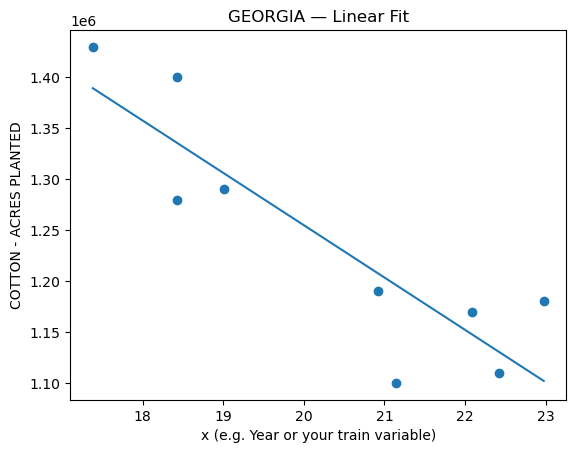

prediction: 1177376.779926955
predictionoosrate: 6   -177376.779927
Name: COTTON - ACRES PLANTED, dtype: float64
CALIFORNIA R²: 0.4152
CALIFORNIA coeffs: [-22679.34014481 653101.2841803 ]


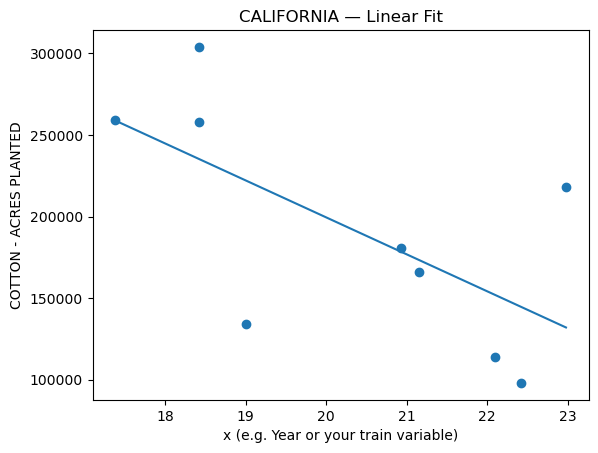

prediction: 165290.1950713602
predictionoosrate: 4   -48290.195071
Name: COTTON - ACRES PLANTED, dtype: float64
SOUTH CAROLINA R²: 0.8119
SOUTH CAROLINA coeffs: [-19276.70863946 629876.80971602]


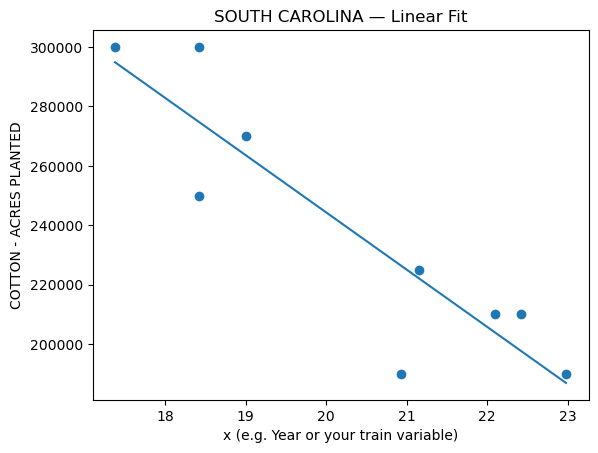

prediction: 215253.09598312626
predictionoosrate: 14   -35253.095983
Name: COTTON - ACRES PLANTED, dtype: float64
NORTH CAROLINA R²: 0.4908
NORTH CAROLINA coeffs: [-22950.1939822  865047.24110106]


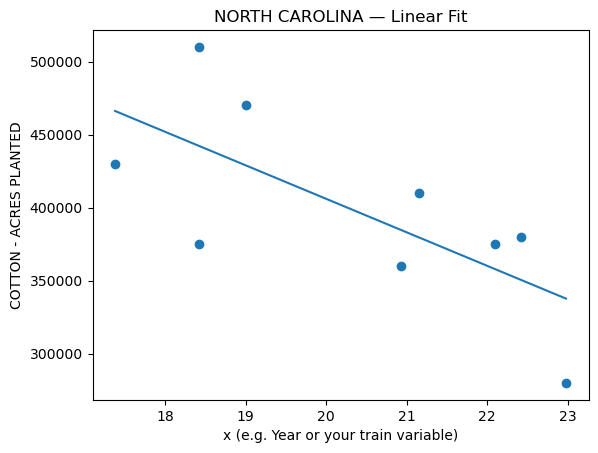

prediction: 371410.34292705375
predictionoosrate: 12   -81410.342927
Name: COTTON - ACRES PLANTED, dtype: float64
VIRGINIA R²: 0.6481
VIRGINIA coeffs: [ -4042.90039541 168340.56021731]


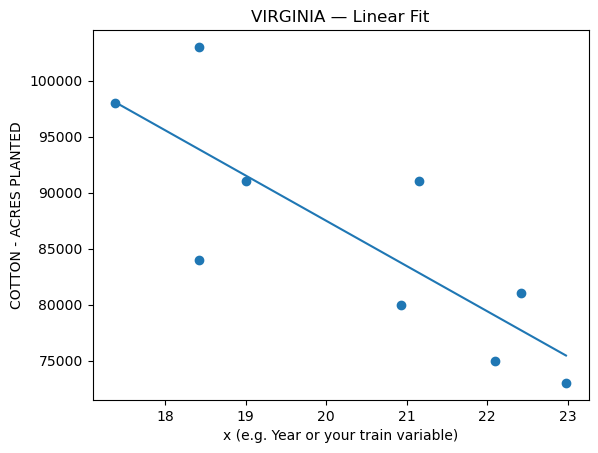

prediction: 81381.60848184985
predictionoosrate: 17    6618.391518
Name: COTTON - ACRES PLANTED, dtype: float64
MISSOURI R²: 0.0791
MISSOURI coeffs: [ -5535.10102029 445205.30553408]


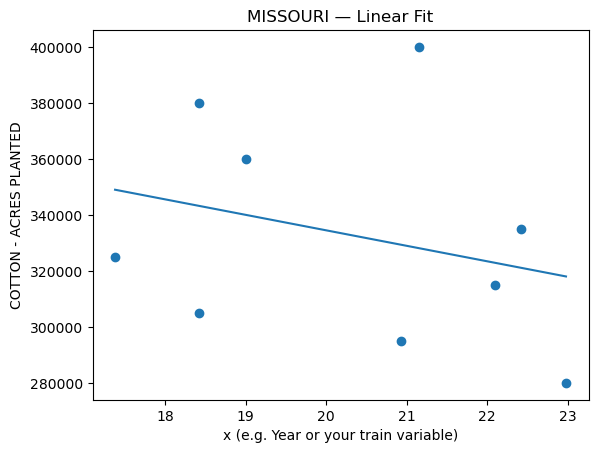

prediction: 326150.5341079681
predictionoosrate: 10   -6150.534108
Name: COTTON - ACRES PLANTED, dtype: float64
OKLAHOMA R²: 0.8792
OKLAHOMA coeffs: [ -64966.68346081 1854030.76838892]


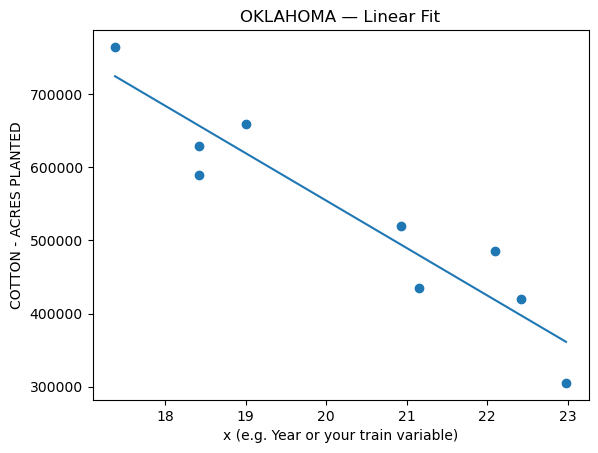

prediction: 456659.0453819956
predictionoosrate: 13   -126659.045382
Name: COTTON - ACRES PLANTED, dtype: float64
TENNESSEE R²: 0.8057
TENNESSEE coeffs: [-23902.21914054 795495.6388347 ]


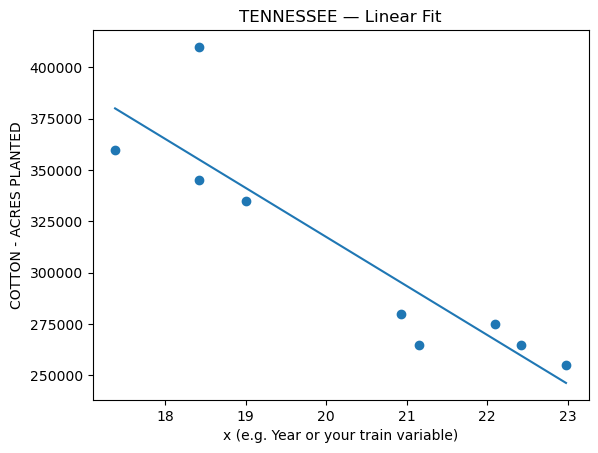

prediction: 281381.5827546992
predictionoosrate: 15   -46381.582755
Name: COTTON - ACRES PLANTED, dtype: float64
FLORIDA R²: 0.4991
FLORIDA coeffs: [ -3663.03985062 174513.82083015]


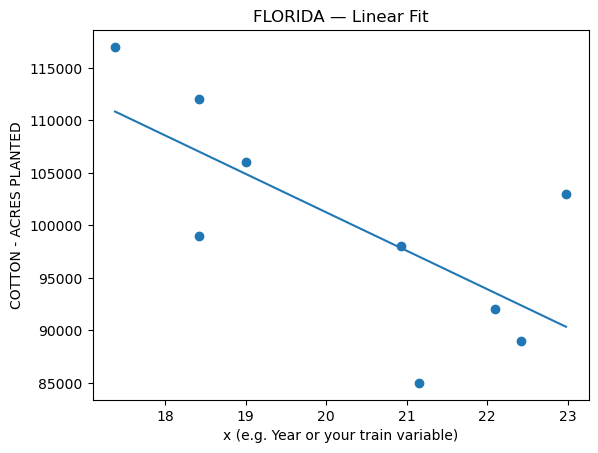

prediction: 95725.30901403903
predictionoosrate: 5   -30725.309014
Name: COTTON - ACRES PLANTED, dtype: float64
US TOTAL R²: 0.9098
US TOTAL coeffs: [ -719546.34885377 26731848.81159195]


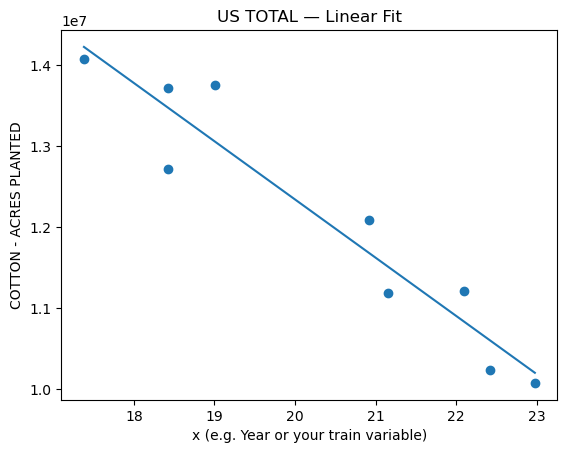

prediction: 11255089.529464072
predictionoosrate: 0   -1.388090e+06
Name: COTTON - ACRES PLANTED, dtype: float64
LOUISIANA R²: 0.6725
LOUISIANA coeffs: [-21458.44125406 611969.37112386]


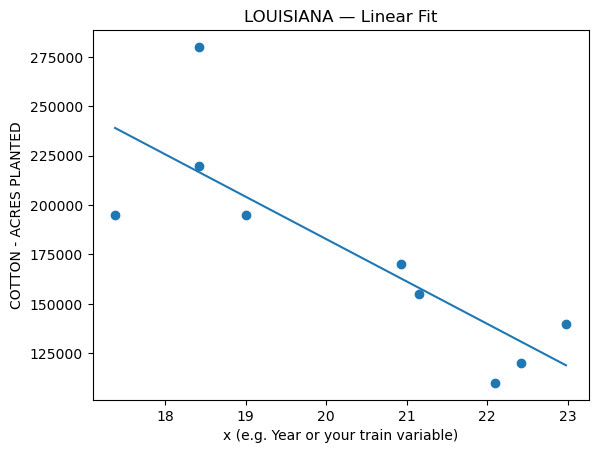

prediction: 150418.65880650363
predictionoosrate: 8   -40418.658807
Name: COTTON - ACRES PLANTED, dtype: float64
MISSISSIPPI R²: 0.7895
MISSISSIPPI coeffs: [ -44547.29767547 1440388.64306727]


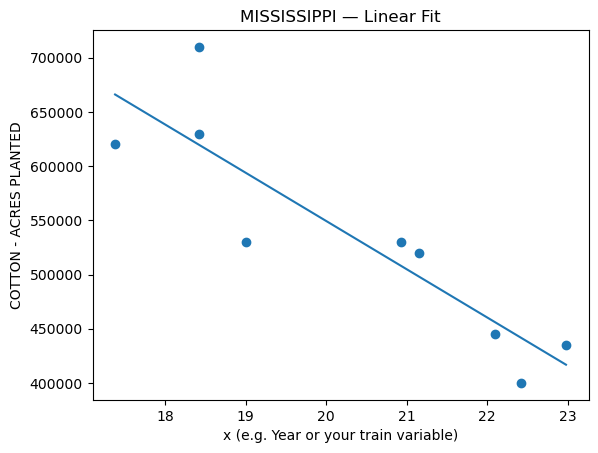

prediction: 482218.5350667257
predictionoosrate: 9   -122218.535067
Name: COTTON - ACRES PLANTED, dtype: float64
ARIZONA R²: 0.4328
ARIZONA coeffs: [-10100.65011926 340272.88096444]


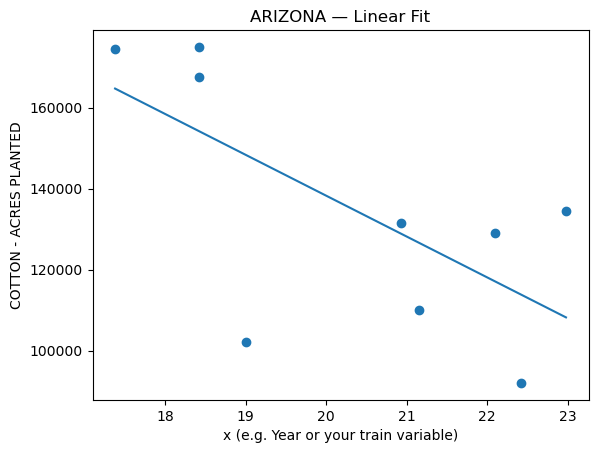

prediction: 123017.4800611194
predictionoosrate: 2    10982.519939
Name: COTTON - ACRES PLANTED, dtype: float64
TEXAS R²: 0.7781
TEXAS coeffs: [ -366564.17974061 14130111.53388152]


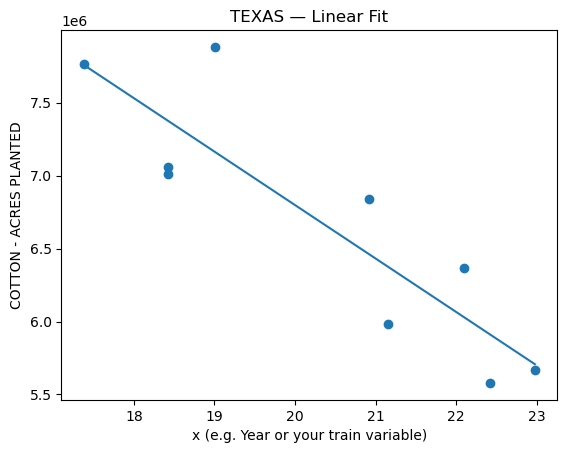

prediction: 6245663.811600003
predictionoosrate: 16   -718663.8116
Name: COTTON - ACRES PLANTED, dtype: float64
ARKANSAS R²: 0.0899
ARKANSAS coeffs: [-13682.88345926 804034.269923  ]


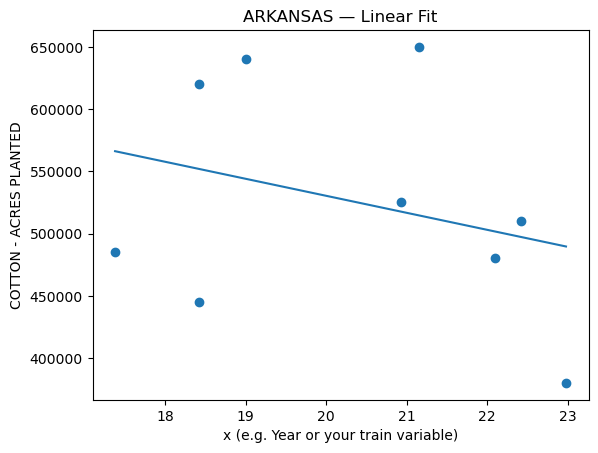

prediction: 509728.42858052964
predictionoosrate: 3    70271.571419
Name: COTTON - ACRES PLANTED, dtype: float64
NEW MEXICO R²: 0.8095
NEW MEXICO coeffs: [ -6355.39623036 193366.92781716]


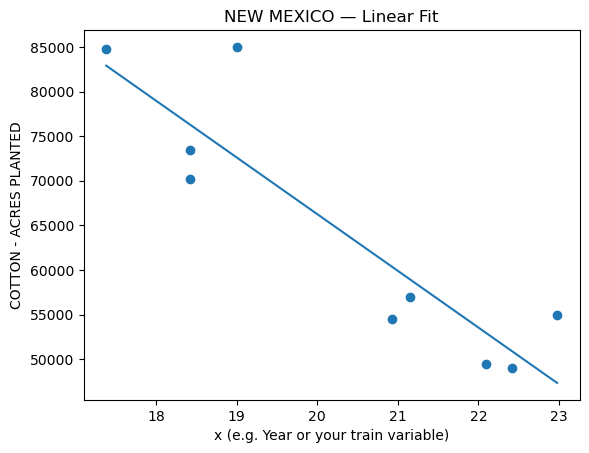

prediction: 56668.38469129117
predictionoosrate: 11   -25668.384691
Name: COTTON - ACRES PLANTED, dtype: float64
KANSAS R²: 0.2912
KANSAS coeffs: [-12927.16189762 392017.58407227]


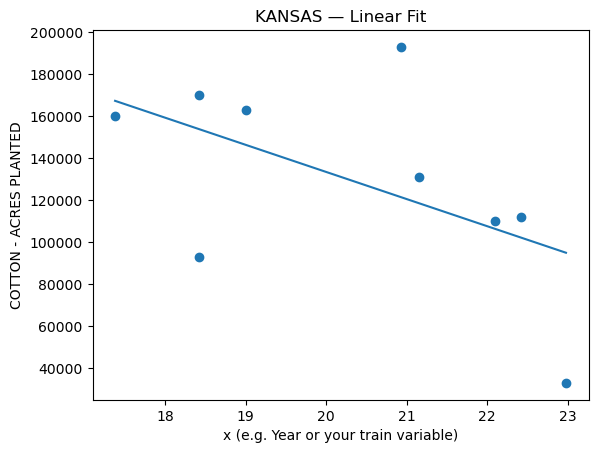

prediction: 113966.596517089
predictionoosrate: 7    26033.403483
Name: COTTON - ACRES PLANTED, dtype: float64
ALABAMA R²: 0.7185
ALABAMA coeffs: [-25518.9868364  951668.33577423]


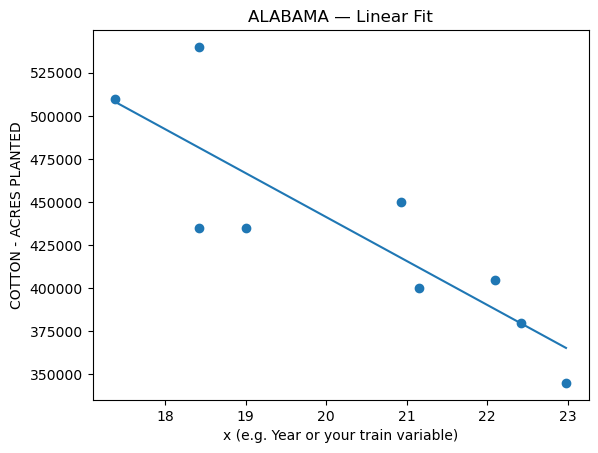

prediction: 402779.14049176127
predictionoosrate: 1   -42779.140492
Name: COTTON - ACRES PLANTED, dtype: float64


In [271]:
listofplanted = []
for state in list_of_states:
    # Prepare x and y
    
    x = np.asarray(x_train).ravel()
    state_df = df[df['State'] == state].copy()
    state_df = state_df[state_df['Year'] != 2025]
    state_df = state_df[state_df['Year'] != 2015]
    state_df.sort_values('Year', inplace=True)
    y = state_df['COTTON - ACRES PLANTED'].values

    # Fit cubic
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state} R²: {r2:.4f}")
    print(f"{state} coeffs: {coeffs}")

    # Build a smooth x-axis for plotting the fitted curve
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure()               # new figure per state
    plt.scatter(x, y)          # actual data
    plt.plot(x_line, y_line)   # fitted cubic curve
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("x (e.g. Year or your train variable)")
    plt.ylabel("COTTON - ACRES PLANTED")
    plt.show()
    
    state2025 = df[df['State'] == state].copy()
    state2025 = state2025[state2025['Year']==2025]
    prediction = coeffs[0]*futures_prices_2025_ratio + coeffs[1]
    predictionoosdiff = state2025['COTTON - ACRES PLANTED']-prediction
    print(f'prediction: {prediction}')
    print(f'predictionoosrate: {predictionoosdiff}')
    
    listofplanted.append({state:prediction})

In [272]:
listofplanted

[{'GEORGIA': 1177376.779926955},
 {'CALIFORNIA': 165290.1950713602},
 {'SOUTH CAROLINA': 215253.09598312626},
 {'NORTH CAROLINA': 371410.34292705375},
 {'VIRGINIA': 81381.60848184985},
 {'MISSOURI': 326150.5341079681},
 {'OKLAHOMA': 456659.0453819956},
 {'TENNESSEE': 281381.5827546992},
 {'FLORIDA': 95725.30901403903},
 {'US TOTAL': 11255089.529464072},
 {'LOUISIANA': 150418.65880650363},
 {'MISSISSIPPI': 482218.5350667257},
 {'ARIZONA': 123017.4800611194},
 {'TEXAS': 6245663.811600003},
 {'ARKANSAS': 509728.42858052964},
 {'NEW MEXICO': 56668.38469129117},
 {'KANSAS': 113966.596517089},
 {'ALABAMA': 402779.14049176127}]


significant difference in states affected by rain in 2015

GEORGIA R²: 0.7737	GEORGIA R²: 0.7312
CALIFORNIA R²: 0.4152	CALIFORNIA R²: 0.4157
SOUTH CAROLINA R²: 0.8119	SOUTH CAROLINA R²: 0.8116
NORTH CAROLINA R²: 0.4908	NORTH CAROLINA R²: 0.4922
VIRGINIA R²: 0.6481	VIRGINIA R²: 0.6487
MISSOURI R²: 0.0791	MISSOURI R²: 0.0472
OKLAHOMA R²: 0.8792	OKLAHOMA R²: 0.6045
TENNESSEE R²: 0.8057	TENNESSEE R²: 0.4670
FLORIDA R²: 0.4991	FLORIDA R²: 0.4339
US TOTAL R²: 0.9098	US TOTAL R²: 0.6179
LOUISIANA R²: 0.6725	LOUISIANA R²: 0.6134
MISSISSIPPI R²: 0.7895	MISSISSIPPI R²: 0.5693
ARIZONA R²: 0.4328	ARIZONA R²: 0.4140
TEXAS R²: 0.7781	TEXAS R²: 0.5465
ARKANSAS R²: 0.0899	ARKANSAS R²: 0.0561
NEW MEXICO R²: 0.8095	NEW MEXICO R²: 0.6749
KANSAS R²: 0.2912	KANSAS R²: 0.2090
ALABAMA R²: 0.7185	ALABAMA R²: 0.5463

safe to conclude the fitted model for prediction on acreage



TypeError: list indices must be integers or slices, not dict

In [294]:
print(listofplanted)
print('-------------')
print(listofabdrate)
print('-------------')
print(listofyields)

[{'GEORGIA': 1177376.779926955}, {'CALIFORNIA': 165290.1950713602}, {'SOUTH CAROLINA': 215253.09598312626}, {'NORTH CAROLINA': 371410.34292705375}, {'VIRGINIA': 81381.60848184985}, {'MISSOURI': 326150.5341079681}, {'OKLAHOMA': 456659.0453819956}, {'TENNESSEE': 281381.5827546992}, {'FLORIDA': 95725.30901403903}, {'US TOTAL': 11255089.529464072}, {'LOUISIANA': 150418.65880650363}, {'MISSISSIPPI': 482218.5350667257}, {'ARIZONA': 123017.4800611194}, {'TEXAS': 6245663.811600003}, {'ARKANSAS': 509728.42858052964}, {'NEW MEXICO': 56668.38469129117}, {'KANSAS': 113966.596517089}, {'ALABAMA': 402779.14049176127}]
-------------
[{'GEORGIA': 0.0142532364394099}, {'CALIFORNIA': 0.016238528025880772}, {'SOUTH CAROLINA': 0.005383467144634224}, {'NORTH CAROLINA': 0.01918622676079984}, {'VIRGINIA': 0.012020911080515409}, {'MISSOURI': 0.022037921435941854}, {'OKLAHOMA': 0.5875340002342426}, {'TENNESSEE': 0.03909165268679171}, {'FLORIDA': 0.03352669095227023}, {'US TOTAL': 0.3517377401435624}, {'LOUISIA

In [297]:
listofproduction = []

for planted_dict in listofplanted:
    # unpack the one (state, planted) pair
    state, planted = next(iter(planted_dict.items()))
    
    # find the matching abandonment‐rate and yield
    abdrate = next(d[state] for d in listofabdrate  if state in d)
    yld     = next(d[state] for d in listofyields if state in d)
    
    # compute
    production = planted * (1 - abdrate) * yld / 480
    listofproduction.append({state: production})

print(listofproduction)


[{'GEORGIA': 2230116.20436961}, {'CALIFORNIA': 490099.37941418117}, {'SOUTH CAROLINA': 445881.0901051113}, {'NORTH CAROLINA': 793330.4272645115}, {'VIRGINIA': 201790.01752316894}, {'MISSOURI': 903772.387469285}, {'OKLAHOMA': 224327.15655904997}, {'TENNESSEE': 629877.1950127679}, {'FLORIDA': 114861.1294633079}, {'US TOTAL': 13874021.617452856}, {'LOUISIANA': 304950.8861279386}, {'MISSISSIPPI': 1089571.0750889604}, {'ARIZONA': 311170.36610914266}, {'TEXAS': 3479497.502996019}, {'ARKANSAS': 1395915.103612889}, {'NEW MEXICO': 60443.0362928134}, {'KANSAS': 135785.98131758446}, {'ALABAMA': 710550.0771958554}]


In [324]:
len(listofproduction)

18


\begin{align}
Production = \frac{Planted \cdot \left(1-Abandonment\right) \cdot Yield}{480} 
\end{align}